In [1]:
import paramak
import numpy as np

# === COLOR MAP by COMPONENT NAME KEYWORDS ===
color_map = {
    "plasma": [0.94, 0.012, 1],
    "first_wall": [0.8, 0.2, 0.2],
    "blanket": [0.3, 0.7, 0.3],
    "back_wall": [0.7, 0.7, 0.3],
    "He_manifolds": [0.85, 0.85, 0.1],
    "structural_ring": [0.2, 0.4, 0.7],
    "vv": [0.4, 0.4, 0.4],
    "shield": [0.6, 0.6, 0.95],
    "inner_coil_case": [0.5, 0.5, 0.8],
    "winding_pack": [0.1, 0.22, 0.33],
    "outer_coil_case": [0.2, 0.45, 0.67],
    "thermal_shield": [0.1, 0.26, 0.82],
    "central_solenoid": [0.85, 0.85, 0.1],
}

# === FUNCTION TO GET COLOR BASED ON NAME ===
def get_color(name):
    for key in color_map:
        if key in name:
            return color_map[key]
    return [0.9, 0.9, 0.9]  # default light gray

# === GEOMETRY PARAMETERS ===
inboard_angle_offset = 10
outboard_angle_offset = 5
plasma_offset = 10
first_wall_thickness = 4
inboard_blanket_thickness = 44
outboard_blanket_thickness = 96
back_wall_thickness = 2
He_manifolds_thickness = 6
structural_ring_thickness = 20
inboard_structural_ring_offset = 1
outboard_structural_ring_offset = 150
vv_thickness = 10
vv_offset = 2
inboard_shield_thickness = 23
outboard_shield_thickness = 17
rotation_angle = 180
num_points = 200

# === PLASMA ===
plasma = paramak.Plasma(
    major_radius=480,
    minor_radius=120,
    triangularity=0.625,
    elongation=2.2,
    rotation_angle=rotation_angle,
    name='plasma',
    color=get_color('plasma')
)
plasma_volume=plasma.volume()

# === INBOARD COMPONENTS ===
offset = plasma_offset
inboard_angles = (90 + inboard_angle_offset, 270 - inboard_angle_offset)

inboard_first_wall = paramak.BlanketFP(
    first_wall_thickness, *inboard_angles,
    plasma=plasma, offset_from_plasma=offset,
    rotation_angle=rotation_angle, name='inboard_first_wall',
    num_points=num_points, color=get_color('inboard_first_wall')
)
offset += first_wall_thickness

inboard_blanket = paramak.BlanketFP(
    inboard_blanket_thickness, *inboard_angles,
    plasma=plasma, offset_from_plasma=offset,
    rotation_angle=rotation_angle, name='inboard_blanket',
    num_points=num_points, color=get_color('inboard_blanket')
)
offset += inboard_blanket_thickness

back_wall = paramak.BlanketFP(
    back_wall_thickness, *inboard_angles,
    plasma=plasma, offset_from_plasma=offset,
    rotation_angle=rotation_angle, name='back_wall',
    num_points=num_points, color=get_color('back_wall')
)
offset += back_wall_thickness

inboard_He_manifolds = paramak.BlanketFP(
    He_manifolds_thickness, *inboard_angles,
    plasma=plasma, offset_from_plasma=offset,
    rotation_angle=rotation_angle, name='inboard_He_manifolds',
    num_points=num_points, color=get_color('inboard_He_manifolds')
)
offset += He_manifolds_thickness

inboard_structural_ring = paramak.BlanketFP(
    structural_ring_thickness, *inboard_angles,
    plasma=plasma, offset_from_plasma=offset,
    rotation_angle=rotation_angle, name='inboard_structural_ring',
    num_points=num_points, color=get_color('inboard_structural_ring')
)
offset += structural_ring_thickness + inboard_structural_ring_offset

inboard_vv = paramak.BlanketFP(
    vv_thickness, *inboard_angles,
    plasma=plasma, offset_from_plasma=offset,
    rotation_angle=rotation_angle, name='inboard_vv',
    num_points=num_points, color=get_color('inboard_vv')
)
offset += vv_thickness + vv_offset

inboard_shield = paramak.BlanketFP(
    inboard_shield_thickness, *inboard_angles,
    plasma=plasma, offset_from_plasma=offset,
    rotation_angle=rotation_angle, name='inboard_shield',
    num_points=num_points, color=get_color('inboard_shield')
)

# === OUTBOARD COMPONENTS ===
offset = plasma_offset
outboard_angles = (-90 + outboard_angle_offset, 90 - outboard_angle_offset)

outboard_first_wall = paramak.BlanketFP(
    first_wall_thickness, *outboard_angles,
    plasma=plasma, offset_from_plasma=offset,
    rotation_angle=rotation_angle, name='outboard_first_wall',
    num_points=num_points, color=get_color('outboard_first_wall')
)
offset += first_wall_thickness

outboard_blanket = paramak.BlanketFP(
    outboard_blanket_thickness, *outboard_angles,
    plasma=plasma, offset_from_plasma=offset,
    rotation_angle=rotation_angle, name='outboard_blanket',
    num_points=num_points, color=get_color('outboard_blanket')
)
offset += outboard_blanket_thickness

outboard_He_manifolds = paramak.BlanketFP(
    He_manifolds_thickness, *outboard_angles,
    plasma=plasma, offset_from_plasma=offset,
    rotation_angle=rotation_angle, name='outboard_He_manifolds',
    num_points=num_points, color=get_color('outboard_He_manifolds')
)
offset += He_manifolds_thickness

outboard_structural_ring = paramak.BlanketFP(
    structural_ring_thickness, *outboard_angles,
    plasma=plasma, offset_from_plasma=offset,
    rotation_angle=rotation_angle, name='outboard_structural_ring',
    num_points=num_points, color=get_color('outboard_structural_ring')
)
offset += structural_ring_thickness + outboard_structural_ring_offset

outboard_vv = paramak.BlanketFP(
    vv_thickness, *outboard_angles,
    plasma=plasma, offset_from_plasma=offset,
    rotation_angle=rotation_angle, name='outboard_vv',
    num_points=num_points, color=get_color('outboard_vv')
)
offset += vv_thickness + vv_offset

outboard_shield = paramak.BlanketFP(
    outboard_shield_thickness, *outboard_angles,
    plasma=plasma, offset_from_plasma=offset,
    rotation_angle=rotation_angle, name='outboard_shield',
    num_points=num_points, color=get_color('outboard_shield')
)

# === CENTER COLUMN COMPONENTS ===
central_solenoid = paramak.CenterColumnShieldCylinder(
    height=1000,
    inner_radius=0,
    outer_radius=104.7,
    name='central_solenoid',
    color=get_color('central_solenoid')
)

coil_case_inner = paramak.CenterColumnShieldCylinder(
    height=1000,
    inner_radius=104.7,
    outer_radius=151.7,
    name='inner_coil_case',
    color=get_color('inner_coil_case')
)

winding_pack = paramak.CenterColumnShieldCylinder(
    height=1000,
    inner_radius=151.7,
    outer_radius=214.7,
    name='winding_pack',
    color=get_color('winding_pack')
)

coil_case_outer = paramak.CenterColumnShieldCylinder(
    height=1000,
    inner_radius=215.0,
    outer_radius=222.0,
    name='outer_coil_case',
    color=get_color('outer_coil_case')
)

thermal_shield = paramak.CenterColumnShieldCylinder(
    height=1000,
    inner_radius=222.0,
    outer_radius=224.0,
    name='thermal_shield',
    color=get_color('thermal_shield')
)

# === REACTOR ASSEMBLY ===
fnsf_reactor = paramak.Reactor(
    shapes_and_components=[
        plasma,
        inboard_first_wall, inboard_blanket, back_wall,
        inboard_He_manifolds, inboard_structural_ring, inboard_vv, inboard_shield,
        outboard_first_wall, outboard_blanket, outboard_He_manifolds,
        outboard_structural_ring, outboard_vv, outboard_shield,
        central_solenoid, coil_case_inner, coil_case_outer, winding_pack, thermal_shield,
    ]
)

# === DISPLAY MODEL ===
#fnsf_reactor.export_html_3d('my_reactor_3d.html')

In [5]:
print(plasma_volume)

130398723.1299594


In [ ]:
import json
from pathlib import Path


if __name__ == '__main__':
    #fnsf_reactor.export_html_3d('fnsf_reactor.html')
    #fnsf_reactor.export_html('fnsf_reactor_2d.html')
    fnsf_reactor.export_stp(filename='ball_reactor.stp')
    fnsf_reactor.export_stl(filename='ball_reactor.stl')

    

In [3]:
fnsf_reactor.export_svg(filename='fnsf_reactor.svg', projectionDir=(0.8,-0.8,-0.2))
for shape in fnsf_reactor.shapes_and_components:
    print(f"{shape.name}: {shape.color}")

Saved file as  fnsf_reactor.svg
plasma: [0.94, 0.012, 1]
inboard_first_wall: [0.8, 0.2, 0.2]
inboard_blanket: [0.3, 0.7, 0.3]
back_wall: [0.7, 0.7, 0.3]
inboard_He_manifolds: [0.85, 0.85, 0.1]
inboard_structural_ring: [0.2, 0.4, 0.7]
inboard_vv: [0.4, 0.4, 0.4]
inboard_shield: [0.6, 0.6, 0.95]
outboard_first_wall: [0.8, 0.2, 0.2]
outboard_blanket: [0.3, 0.7, 0.3]
outboard_He_manifolds: [0.85, 0.85, 0.1]
outboard_structural_ring: [0.2, 0.4, 0.7]
outboard_vv: [0.4, 0.4, 0.4]
outboard_shield: [0.6, 0.6, 0.95]
central_solenoid: [0.85, 0.85, 0.1]
inner_coil_case: [0.5, 0.5, 0.8]
outer_coil_case: [0.2, 0.45, 0.67]
winding_pack: [0.1, 0.22, 0.33]
thermal_shield: [0.6, 0.6, 0.95]


Saved file as  reactor.svg
Skipping a path due to error: list index out of range
Skipping a path due to error: list index out of range
Skipping a path due to error: list index out of range
Skipping a path due to error: list index out of range
Skipping a path due to error: list index out of range
Skipping a path due to error: list index out of range
Skipping a path due to error: list index out of range
Skipping a path due to error: list index out of range
Skipping a path due to error: list index out of range
Skipping a path due to error: list index out of range
Skipping a path due to error: list index out of range
Skipping a path due to error: list index out of range
Skipping a path due to error: list index out of range
Skipping a path due to error: list index out of range
Skipping a path due to error: list index out of range
Skipping a path due to error: list index out of range
Skipping a path due to error: list index out of range
Skipping a path due to error: list index out of range
S

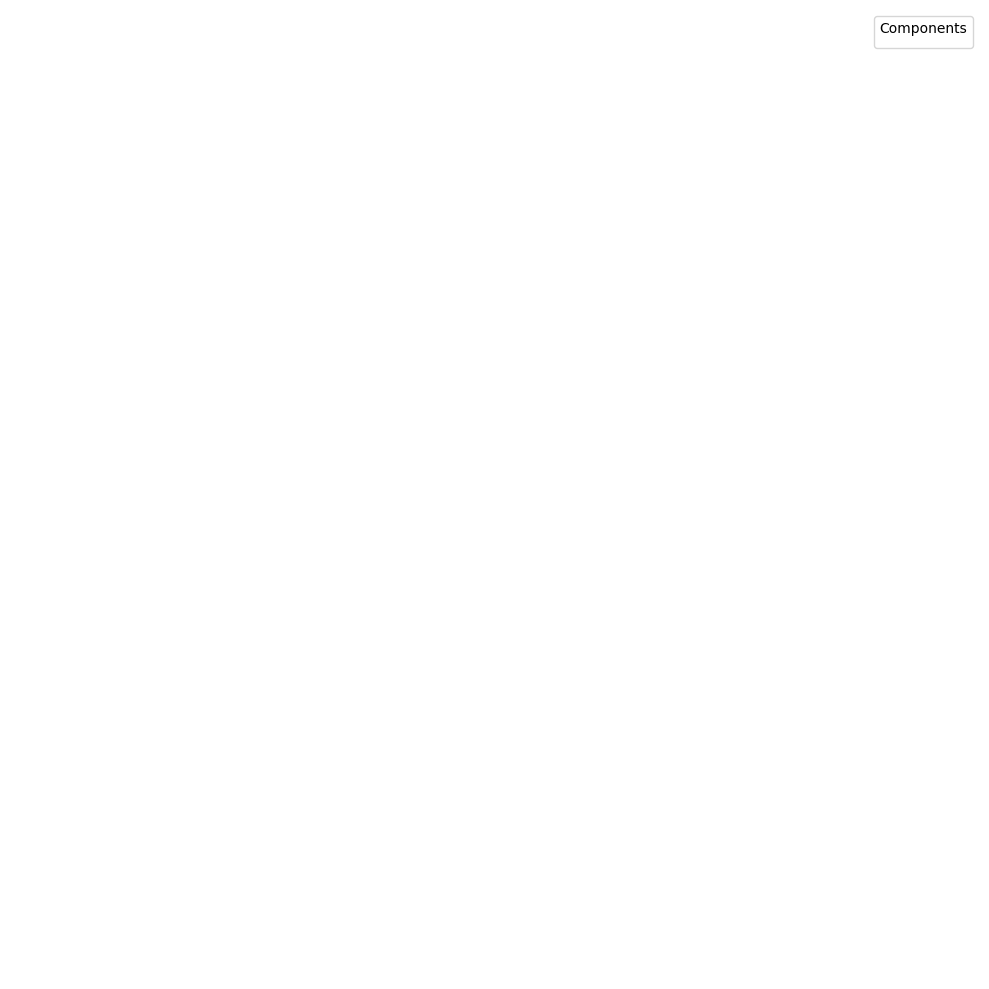

In [14]:

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.patches as mpatches
from svgpath2mpl import parse_path
from xml.dom import minidom
import paramak

# 1. Create reactor and export SVG cross section (defaults to XZ plane)
reactor = paramak.SubmersionTokamak(rotation_angle=180)
reactor.export_svg("reactor.svg")

# 2. Parse the SVG file
doc = minidom.parse("reactor.svg")
paths = doc.getElementsByTagName('path')

# 3. Prepare Matplotlib figure
fig, ax = plt.subplots(figsize=(10, 10))
legend_patches = []
seen_colors = {}

# 4. Loop through SVG paths and draw them
for path in paths:
    d = path.getAttribute('d')
    style = path.getAttribute('style')
    
    try:
        color = style.split('fill:')[1].split(';')[0]
        mpl_path = parse_path(d)
        patch = mpatches.PathPatch(mpl_path, facecolor=color, edgecolor='black', lw=0.5)
        ax.add_patch(patch)

        # Add to legend only if not already added
        if color not in seen_colors:
            shape_id = path.getAttribute('id') or f"Component {len(seen_colors)+1}"
            legend_patches.append(Patch(facecolor=color, edgecolor='black', label=shape_id))
            seen_colors[color] = True

    except Exception as e:
        print(f"Skipping a path due to error: {e}")

# 5. Final plot settings
ax.set_aspect('equal')
ax.axis('off')
ax.legend(handles=legend_patches, loc='upper right', title="Components")

plt.tight_layout()
plt.show()



Saved file as  reactor.svg
Skipping path with missing fill color or invalid style attribute
Skipping path with missing fill color or invalid style attribute
Skipping path with missing fill color or invalid style attribute
Skipping path with missing fill color or invalid style attribute
Skipping path with missing fill color or invalid style attribute
Skipping path with missing fill color or invalid style attribute
Skipping path with missing fill color or invalid style attribute
Skipping path with missing fill color or invalid style attribute
Skipping path with missing fill color or invalid style attribute
Skipping path with missing fill color or invalid style attribute
Skipping path with missing fill color or invalid style attribute
Skipping path with missing fill color or invalid style attribute
Skipping path with missing fill color or invalid style attribute
Skipping path with missing fill color or invalid style attribute
Skipping path with missing fill color or invalid style attribut

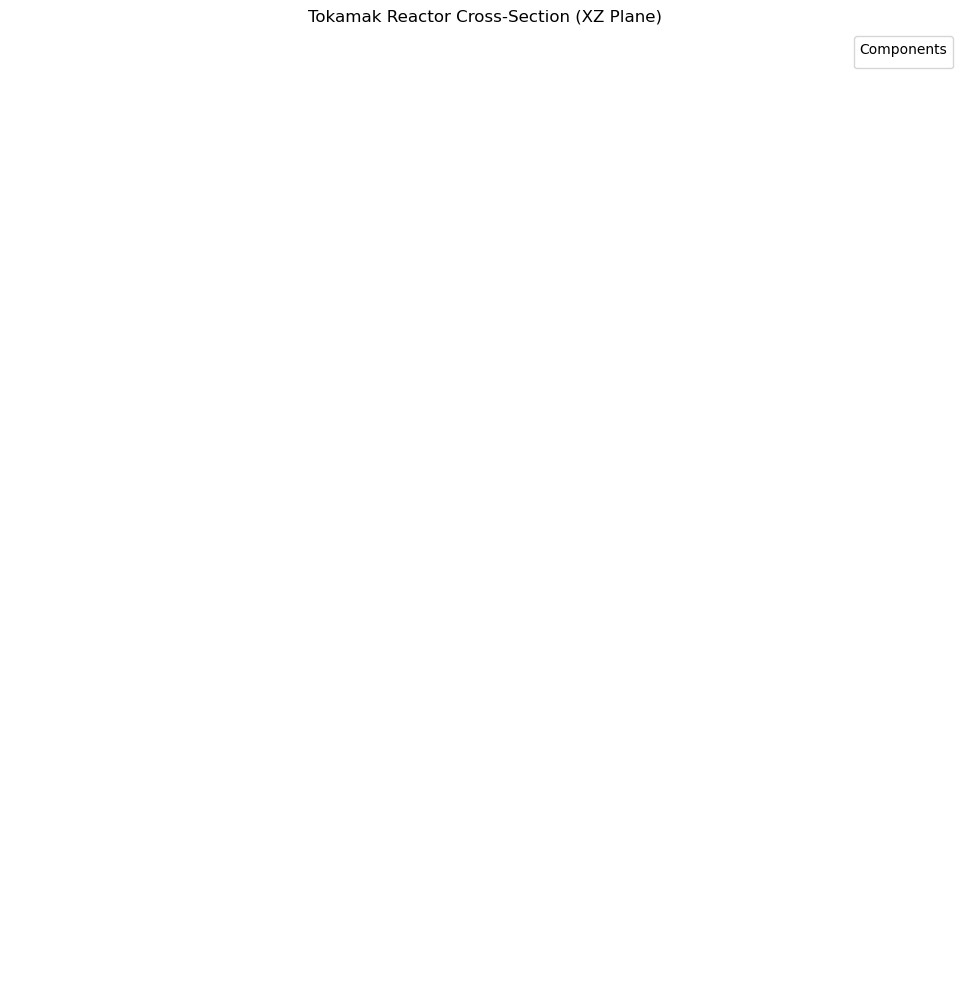

In [16]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from svgpath2mpl import parse_path
import paramak
from xml.dom import minidom

# 1. Create reactor and export SVG cross section

fnsf_reactor.export_svg("reactor.svg")

# 2. Parse the SVG file
doc = minidom.parse("reactor.svg")
paths = doc.getElementsByTagName('path')

# 3. Prepare Matplotlib figure for XZ plane plot
fig, ax = plt.subplots(figsize=(10, 10))
legend_patches = []
seen_colors = {}

# 4. Loop through SVG paths, extract color, and plot
for path in paths:
    d = path.getAttribute('d')
    style = path.getAttribute('style')

    # Check if the path has a valid style with 'fill:' keyword
    if 'fill:' in style:
        try:
            # Extract color from style attribute
            color = style.split('fill:')[1].split(';')[0]
            
            # Parse the SVG path and convert to matplotlib path
            mpl_path = parse_path(d)
            
            # Create a patch for the path and add to the plot
            patch = Patch(facecolor=color, edgecolor='black', lw=0.5)
            ax.add_patch(patch)
            
            # Add the color to legend if not already added
            if color not in seen_colors:
                shape_id = path.getAttribute('id') or f"Component {len(seen_colors)+1}"
                legend_patches.append(Patch(facecolor=color, edgecolor='black', label=shape_id))
                seen_colors[color] = True
        except Exception as e:
            print(f"Skipping path due to error: {e}")
    else:
        print("Skipping path with missing fill color or invalid style attribute")

# 5. Final plot settings
ax.set_aspect('equal')
ax.axis('off')  # Hide axes for a cleaner look
ax.set_title("Tokamak Reactor Cross-Section (XZ Plane)")

# Add legend to the plot
ax.legend(handles=legend_patches, loc='upper right', title="Components")

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:

if __name__ == '__main__':
    # Save the volume of each part to a JSON file for accessing later in OpenMC, useful for doing depletion calculations
    volumes = {}
    for shape in fnsf_reactor.shapes_and_components:
        volumes[shape.name] = shape.volume()

    with open("fnsf_reactor_volumes.json", "w") as outfile:
        json.dump(volumes, outfile, indent=4)

    # # Export DAGMC-compatible geometry
    fnsf_reactor.export_dagmc_h5m(
         filename='fnsf_reactor.h5m',
         min_mesh_size=5,
         max_mesh_size=20
     )


In [3]:
from openmc_plasma_source import TokamakSource
from openmc_plasma_source import plotting as ops_plt
import matplotlib.pyplot as plt
import math
import numpy as np


In [16]:
import openmc
openmc.config['cross_sections']='/home/rifat/endfb-viii.0-hdf5/cross_sections.xml'
materials = openmc.Materials()

# === PLASMA ===
plasma = openmc.Material(1, "plasma")
plasma.add_nuclide('H2', 1.0)
plasma.add_nuclide('H3', 1.0)
plasma.set_density('g/cm3', 1e-5)
materials.append(plasma)

# === FIRST WALLS AND W ARMOR ===
def make_first_wall(mat_id, name):
    mat = openmc.Material(mat_id, name)
    mat.add_element('He', 8.7 * 0.05 + 100 * 0.66 * 0.95, 'wo')
    mat.add_element('Fe', 89.66 * 0.34 * 0.95, 'wo')
    mat.add_element('Cr', 8.0 * 0.34 * 0.95, 'wo')
    mat.add_element('W', 91.3 * 0.05 + 2.0 * 0.34 * 0.95, 'wo')
    mat.add_element('C', 0.1 * 0.34 * 0.95, 'wo')
    mat.add_element('V', 0.2 * 0.34 * 0.95, 'wo')
    mat.add_element('Ta', 0.04 * 0.34 * 0.95, 'wo')
    mat.add_s_alpha_beta('c_Graphite')
    mat.set_density('g/cm3', 2.55)
    return mat

materials.append(make_first_wall(2, "inboard_first_wall"))
materials.append(make_first_wall(3, "outboard_first_wall"))

# === BLANKETS ===
def make_blanket(mat_id, name):
    mat = openmc.Material(mat_id, name)
    mat.add_element('U', 40, 'wo')
    mat.add_element('Li', 33.7, enrichment_target='Li6', enrichment=90, percent_type='wo')
    mat.add_element('C', 1.17, 'wo')
    mat.add_element('Si', 2.73, 'wo')
    mat.add_element('Cr', 0.7875, 'wo')
    mat.add_element('Fe', 6.6975, 'wo')
    mat.add_element('He', 14.9, 'wo')
    mat.add_s_alpha_beta('c_Graphite')
    mat.set_density('g/cm3', 6.52)
    return mat

materials.append(make_blanket(4, "inboard_blanket"))
materials.append(make_blanket(5, "outboard_blanket"))

# === BACK WALL ===
def make_back_wall():
    mat = openmc.Material(6, "back_wall")
    mat.add_element('He', 20.0, 'wo')
    mat.add_element('Fe', 89.66 * 0.80, 'wo')
    mat.add_element('Cr', 8.0 * 0.80, 'wo')
    mat.add_element('W', 2.0 * 0.80, 'wo')
    mat.add_element('C', 0.1 * 0.80, 'wo')
    mat.add_element('V', 0.2 * 0.80, 'wo')
    mat.add_element('Ta', 0.04 * 0.80, 'wo')
    mat.add_s_alpha_beta('c_Graphite')
    mat.set_density('g/cm3', 2.55)
    return mat

materials.append(make_back_wall())

# === HELIUM MANIFOLDS ===
def make_He_manifold(mat_id, name):
    mat = openmc.Material(mat_id, name)
    mat.add_element('He', 70.0, 'wo')
    mat.add_element('Fe', 26.7, 'wo')
    mat.add_element('Cr', 2.55, 'wo')
    mat.add_element('W', 0.6, 'wo')
    mat.add_element('V', 0.06, 'wo')
    mat.add_element('Ta', 0.015, 'wo')
    mat.add_element('C', 0.03, 'wo')
    mat.add_element('Mn', 0.15, 'wo')
    mat.add_element('Si', 0.06, 'wo')
    mat.add_element('N', 0.006, 'wo')
    mat.add_element('Ni', 0.03, 'wo')
    mat.add_element('Cu', 0.015, 'wo')
    mat.add_s_alpha_beta('c_Graphite')
    mat.set_density('g/cm3', 2.544)
    return mat

materials.append(make_He_manifold(7, "inboard_He_manifolds"))
materials.append(make_He_manifold(8, "outboard_He_manifolds"))

# === STRUCTURAL RINGS ===
def make_structural_ring(mat_id, name):
    mat = openmc.Material(mat_id, name)
    mat.add_element('He', 20.0, 'wo')
    mat.add_element('Fe', 89.66 * 0.28, 'wo')
    mat.add_element('Cr', 8.0 * 0.28, 'wo')
    mat.add_element('W', 2.0 * 0.28, 'wo')
    mat.add_element('C', 0.1 * 0.28, 'wo')
    mat.add_element('V', 0.2 * 0.28, 'wo')
    mat.add_element('Ta', 0.04 * 0.28, 'wo')
    mat.add_element('Fe', 90.0 * 0.52, 'wo')
    mat.add_element('Cr', 9.0 * 0.52, 'wo')
    mat.add_element('B', 0.005 * 0.52, 'wo')
    mat.add_element('C', 0.1 * 0.52, 'wo')
    mat.add_element('Mn', 0.3 * 0.52, 'wo')
    mat.add_element('Si', 0.2 * 0.52, 'wo')
    mat.add_s_alpha_beta('c_Graphite')
    mat.set_density('g/cm3', 6.28)
    return mat

materials.append(make_structural_ring(9, "inboard_structural_ring"))
materials.append(make_structural_ring(10, "outboard_structural_ring"))

# === VACUUM VESSEL ===
def make_vacuum_vessel(mat_id, name):
    mat = openmc.Material(mat_id, name)
    mat.add_element('He', 40.0, 'wo')
    mat.add_element('Fe', 55.98, 'wo')
    mat.add_element('Cr', 1.8, 'wo')
    mat.add_element('W', 1.2, 'wo')
    mat.add_element('V', 0.12, 'wo')
    mat.add_element('Ta', 0.03, 'wo')
    mat.add_element('C', 0.06, 'wo')
    mat.add_element('Mn', 0.18, 'wo')
    mat.add_element('Si', 0.12, 'wo')
    mat.add_element('N', 0.012, 'wo')
    mat.add_element('Ni', 0.03, 'wo')
    mat.add_element('Cu', 0.048, 'wo')
    mat.add_s_alpha_beta('c_Graphite')
    mat.set_density('g/cm3', 4.5)
    return mat

materials.append(make_vacuum_vessel(11, "inboard_vv"))
materials.append(make_vacuum_vessel(12, "outboard_vv"))

# === SHIELD ===
def make_shield(mat_id, name):
    mat = openmc.Material(mat_id, name)
    mat.add_element('Fe', 89.66 * 0.39, 'wo')
    mat.add_element('Cr', 8.0 * 0.39, 'wo')
    mat.add_element('W', 2.0 * 0.39, 'wo')
    mat.add_element('C', 0.1 * 0.39, 'wo')
    mat.add_element('V', 0.2 * 0.39, 'wo')
    mat.add_element('Ta', 0.04 * 0.39, 'wo')
    mat.add_element('Fe', 90.0 * 0.29, 'wo')
    mat.add_element('Cr', 9.0 * 0.29, 'wo')
    mat.add_element('B', 0.005 * 0.29, 'wo')
    mat.add_element('C', 0.1 * 0.29, 'wo')
    mat.add_element('Mn', 0.3 * 0.29, 'wo')
    mat.add_element('Si', 0.2 * 0.29, 'wo')
    mat.add_element('H', 2.0 * 0.32, 'wo')
    mat.add_element('O', 16.0 * 0.32, 'wo')
    mat.add_s_alpha_beta('c_H_in_H2O')
    mat.set_density('g/cm3', 5.658)
    return mat

materials.append(make_shield(13, "inboard_shield"))
materials.append(make_shield(14, "outboard_shield"))

# === COIL CASE & CENTRAL SOLENOID ===
center_sol = openmc.Material(15, "central_solenoid")
center_sol.add_element('Nb', 3.0)
center_sol.add_element('Sn', 1.0)
center_sol.set_density('g/cm3', 8.74)
materials.append(center_sol)

def make_coil_case(mat_id, name):
    mat = openmc.Material(mat_id, name)
    mat.add_element('Fe', 64.995, 'wo')
    mat.add_element('Cr', 17.5, 'wo')
    mat.add_element('Ni', 12.0, 'wo')
    mat.add_element('Mo', 2.5, 'wo')
    mat.add_element('Mn', 2.0, 'wo')
    mat.add_element('Si', 0.75, 'wo')
    mat.add_element('C', 0.08, 'wo')
    mat.add_element('N', 0.10, 'wo')
    mat.add_element('P', 0.045, 'wo')
    mat.add_element('S', 0.03, 'wo')
    mat.set_density('g/cm3', 7.98)
    return mat

materials.append(make_coil_case(16, "inner_coil_case"))
materials.append(make_coil_case(17, "outer_coil_case"))


winding_pack = openmc.Material(18, "winding_pack")
winding_pack.add_element('Fe', 89.5 * 0.30, 'wo')
winding_pack.add_element('Cr', 9.0 * 0.30, 'wo')
winding_pack.add_element('Mo', 1.0 * 0.30, 'wo')
winding_pack.add_element('W', 0.5 * 0.30, 'wo')
winding_pack.add_element('C', 0.05 * 0.30, 'wo')
winding_pack.add_element('Cu', 25.0, 'wo')
winding_pack.add_element('Nb', 70.1 * 0.25, 'wo')
winding_pack.add_element('Sn', 29.9 * 0.25, 'wo')
winding_pack.add_element('Si', 60.0 * 0.10, 'wo')
winding_pack.add_element('O', 60.0 * 0.10, 'wo')
winding_pack.add_element('C', 40.0 * 0.10, 'wo')
winding_pack.add_element('He', 10.0, 'wo')
winding_pack.set_density('g/cm3', 5.82)
materials.append(winding_pack)


thermal_shield = openmc.Material(19, "thermal_shield")
thermal_shield.add_element('Be', 100.0 * 0.30, 'wo')
thermal_shield.add_element('Fe', 87.0 * 0.30, 'wo')
thermal_shield.add_element('Cr', 8.0 * 0.30, 'wo')
thermal_shield.add_element('W', 2.0 * 0.30 + 100.0 * 0.10, 'wo')
thermal_shield.add_element('V', 2.0 * 0.30, 'wo')
thermal_shield.add_element('C', 1.0 * 0.30 + 100.0 * 0.20 + 30.0 * 0.10, 'wo')
thermal_shield.add_element('Mn', 0.8 * 0.30, 'wo')
thermal_shield.add_element('Si', 0.2 * 0.30 + 70.0 * 0.10, 'wo')
thermal_shield.set_density('g/cm3', 5.3494)
materials.append(thermal_shield)

# === EXPORT ===
materials.export_to_xml()


In [17]:
dag_univ = openmc.DAGMCUniverse(filename="fnsf_reactor.h5m")
bbox = dag_univ.bounding_box
dagmc_radius = max(abs(bbox[0][0]), abs(bbox[0][1]), abs(bbox[1][0]), abs(bbox[1][1]))

cylinder_surface = openmc.ZCylinder(r=dagmc_radius, boundary_type="vacuum", surface_id=1000)
lower_z = openmc.ZPlane(bbox[0][2], boundary_type="vacuum", surface_id=1003)
upper_z = openmc.ZPlane(bbox[1][2], boundary_type="vacuum", surface_id=1004)

# this is the surface along the side of the 180 degree model
side_surface = openmc.YPlane(y0=0, boundary_type="reflective", surface_id=1001)

wedge_region = -cylinder_surface & +lower_z & -upper_z & +side_surface

# bounding cell is a wedge shape filled with the DAGMC universe
bounding_cell = openmc.Cell(fill=dag_univ, cell_id=1000, region=wedge_region)

# bound_dag_univ = dag_univ.bounded_universe()
geometry = openmc.Geometry([bounding_cell])
geometry.export_to_xml()
print(geometry)

In [18]:
print(dag_univ.bounding_box)

BoundingBox(lower_left=(-914.9076751349346, -223.9999663313185, -571.1831045327964), upper_right=(914.9076751349346, 914.9999996732247, 571.1831045327964))


In [19]:
my_plasma = TokamakSource(
    elongation=2.2,
    ion_density_centre=1.6e20,
    ion_density_pedestal=1e20,
    ion_density_peaking_factor=1.52,
    ion_density_separatrix=0.56e20,
    ion_temperature_centre=22,
    ion_temperature_pedestal=4,
    ion_temperature_separatrix=0.1,
    ion_temperature_peaking_factor=2.25,
    ion_temperature_beta=7,
    major_radius=480,
    minor_radius=120,
    pedestal_radius=114,
    mode="H",
    shafranov_factor=0.144,
    triangularity=0.625,
    sample_size=50000,
)
plasma = my_plasma.make_openmc_sources()
source_density=my_plasma.neutron_source_density.sum()*130398723.1299594/(50000*1e6)

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc_plasma_source/tokamak_source.py:265: RuntimeWarning: invalid value encountered in power
  * (1 - (r / self.pedestal_radius) ** 2)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc_plasma_source/tokamak_source.py:305: RuntimeWarning: invalid value encountered in power
  * (1 - (r / self.pedestal_radius) ** self.ion_temperature_beta)


In [20]:
settings=openmc.Settings()
settings.run_mode="fixed source"
settings.batches=100
settings.particles=50000
settings.source=plasma

In [22]:
tallies=openmc.Tallies()
openmc.reset_auto_ids()

umesh = openmc.UnstructuredMesh(filename="fnsf_reactor.h5m", library="moab", mesh_id=1)
umesh.output = False
mesh1=openmc.RegularMesh.from_domain(geometry, dimension=(200,200,200))
#mesh_filter = openmc.MeshFilter(mesh1)
umesh_filter=openmc.MeshFilter(umesh)
neutron_filter = openmc.ParticleFilter(['neutron'])
mat_filter=openmc.MaterialFilter([4,5])

radial_filter = openmc.ZernikeRadialFilter(order=220, x=0,y=0, r=915)


xflux_tally = openmc.Tally(name="x flux",tally_id=1)
xflux_tally.filters.append(radial_filter)
xflux_tally.scores = ["flux"]
tallies.append(xflux_tally)

uheating_tally = openmc.Tally(name="uheating",tally_id=2)
uheating_tally.scores = ["heating"]
uheating_tally.filters.append(radial_filter)
tallies.append(uheating_tally)


heating_tally = openmc.Tally(name="heating",tally_id=3)
heating_tally.scores = ["heating"]
heating_tally.filters=[umesh_filter]
tallies.append(heating_tally)

tbr_tally = openmc.Tally(name="tbr",tally_id=4)
tbr_tally.scores = ["(n,Xt)"]
tbr_tally.nuclides=['Li6','Li7']
tallies.append(tbr_tally)

utbr_tally = openmc.Tally(name="utbr",tally_id=5)
utbr_tally.scores = ["(n,Xt)"]
utbr_tally.filters.append(radial_filter)
tallies.append(utbr_tally)

import numpy as np
energies = np.logspace(np.log10(1e-5), np.log10(20.0e6), 1001)
e_filter = openmc.EnergyFilter(energies)

# makes a mesh tally using the previously created mesh and records TBR on the mesh
zflux_tally = openmc.Tally(name="z flux",tally_id=6)
order2 = 100
zmin=-571.18
zmax=571.18
z_filter= openmc.SpatialLegendreFilter(order2, 'z', zmin,zmax)
zflux_tally.filters.append(z_filter)
zflux_tally.scores = ["flux"]
tallies.append(zflux_tally)


eflux_tally = openmc.Tally(name="energetic flux",tally_id=7)
eflux_tally.filters = [e_filter]
eflux_tally.scores = ["flux"]
tallies.append(eflux_tally)

absorption_tally=openmc.Tally(name='absorption',tally_id=8)
absorption_tally.filters=[umesh_filter]
absorption_tally.scores=['absorption']
tallies.append(absorption_tally)

uabsorption_tally=openmc.Tally(name='uabsorption',tally_id=9)
uabsorption_tally.filters.append(radial_filter)
uabsorption_tally.scores=['absorption']
tallies.append(uabsorption_tally)

damage_energy = openmc.Tally(name='damage energy',tally_id=10)
damage_energy.filters = [umesh_filter]
damage_energy.scores = ['damage-energy']
tallies.append(damage_energy)

udamage_energy = openmc.Tally(name='udamage energy',tally_id=11)
udamage_energy.filters.append(radial_filter)
udamage_energy.scores = ['damage-energy']
tallies.append(udamage_energy)

In [23]:
# builds the openmc model
model = openmc.Model(
    materials=materials, geometry=geometry, settings=settings, tallies=tallies
)

In [30]:
plot = openmc.Plot()
plot.filename = 'xz'
plot.origin = (0.0, 10.0, 0.0)
plot.width = (2500.0, 2500.0)
plot.pixels = (2500, 2500)
plot.color_by = 'material'
plots = openmc.Plots([plot])
openmc.plot_geometry()


                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

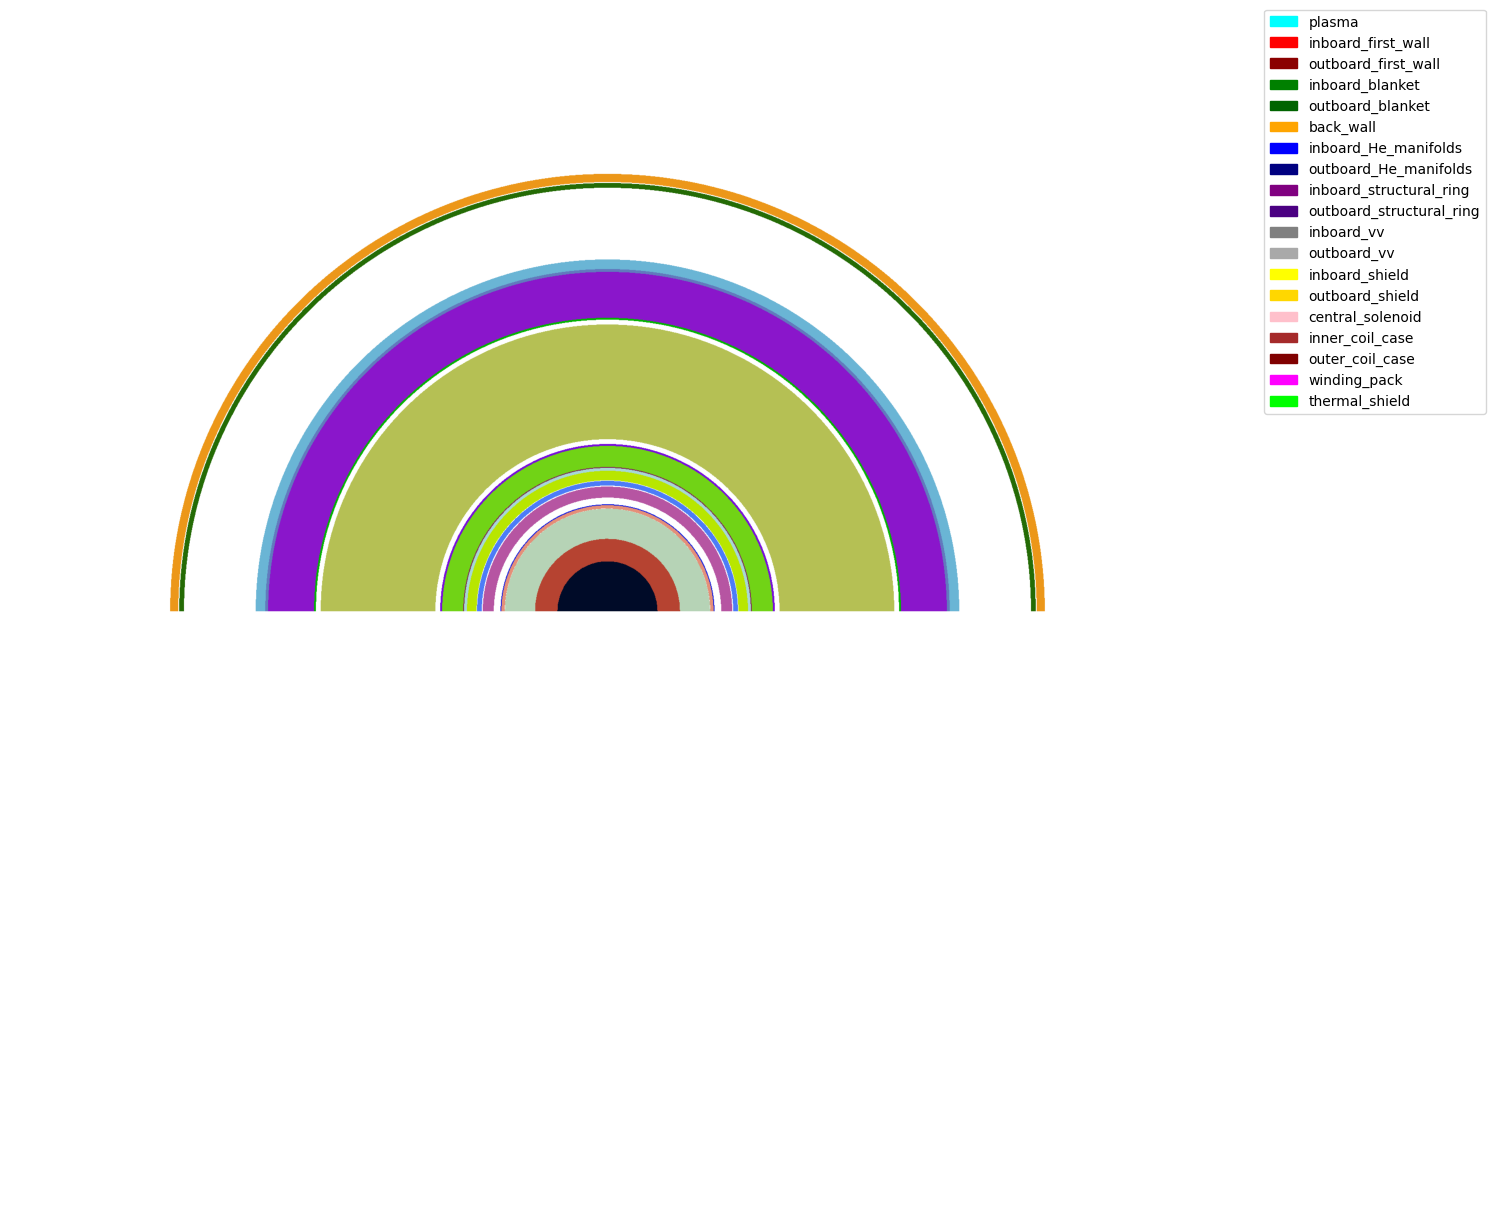

In [31]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.image as mpimg

# Load the plot image
img = mpimg.imread('xz.png')  # or 'xy.png' if converted

# Show the image
plt.figure(figsize=(15,15))
plt.pixels=(2500,2500)
plt.imshow(img)
plt.axis('off')  # hide axes

# Define legend entries (match colors above)
legend_labels = {
    'plasma': 'cyan',
    'inboard_first_wall': 'red',
    'outboard_first_wall': 'darkred',
    'inboard_blanket': 'green',
    'outboard_blanket': 'darkgreen',
    'back_wall': 'orange',
    'inboard_He_manifolds': 'blue',
    'outboard_He_manifolds': 'navy',
    'inboard_structural_ring': 'purple',
    'outboard_structural_ring': 'indigo',
    'inboard_vv': 'grey',
    'outboard_vv': 'darkgrey',
    'inboard_shield': 'yellow',
    'outboard_shield': 'gold',
    'central_solenoid': 'pink',
    'inner_coil_case': 'brown',
    'outer_coil_case': 'maroon',
    'winding_pack': 'magenta',
    'thermal_shield': 'lime'
}

patches = [mpatches.Patch(color=color, label=label) for label, color in legend_labels.items()]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()


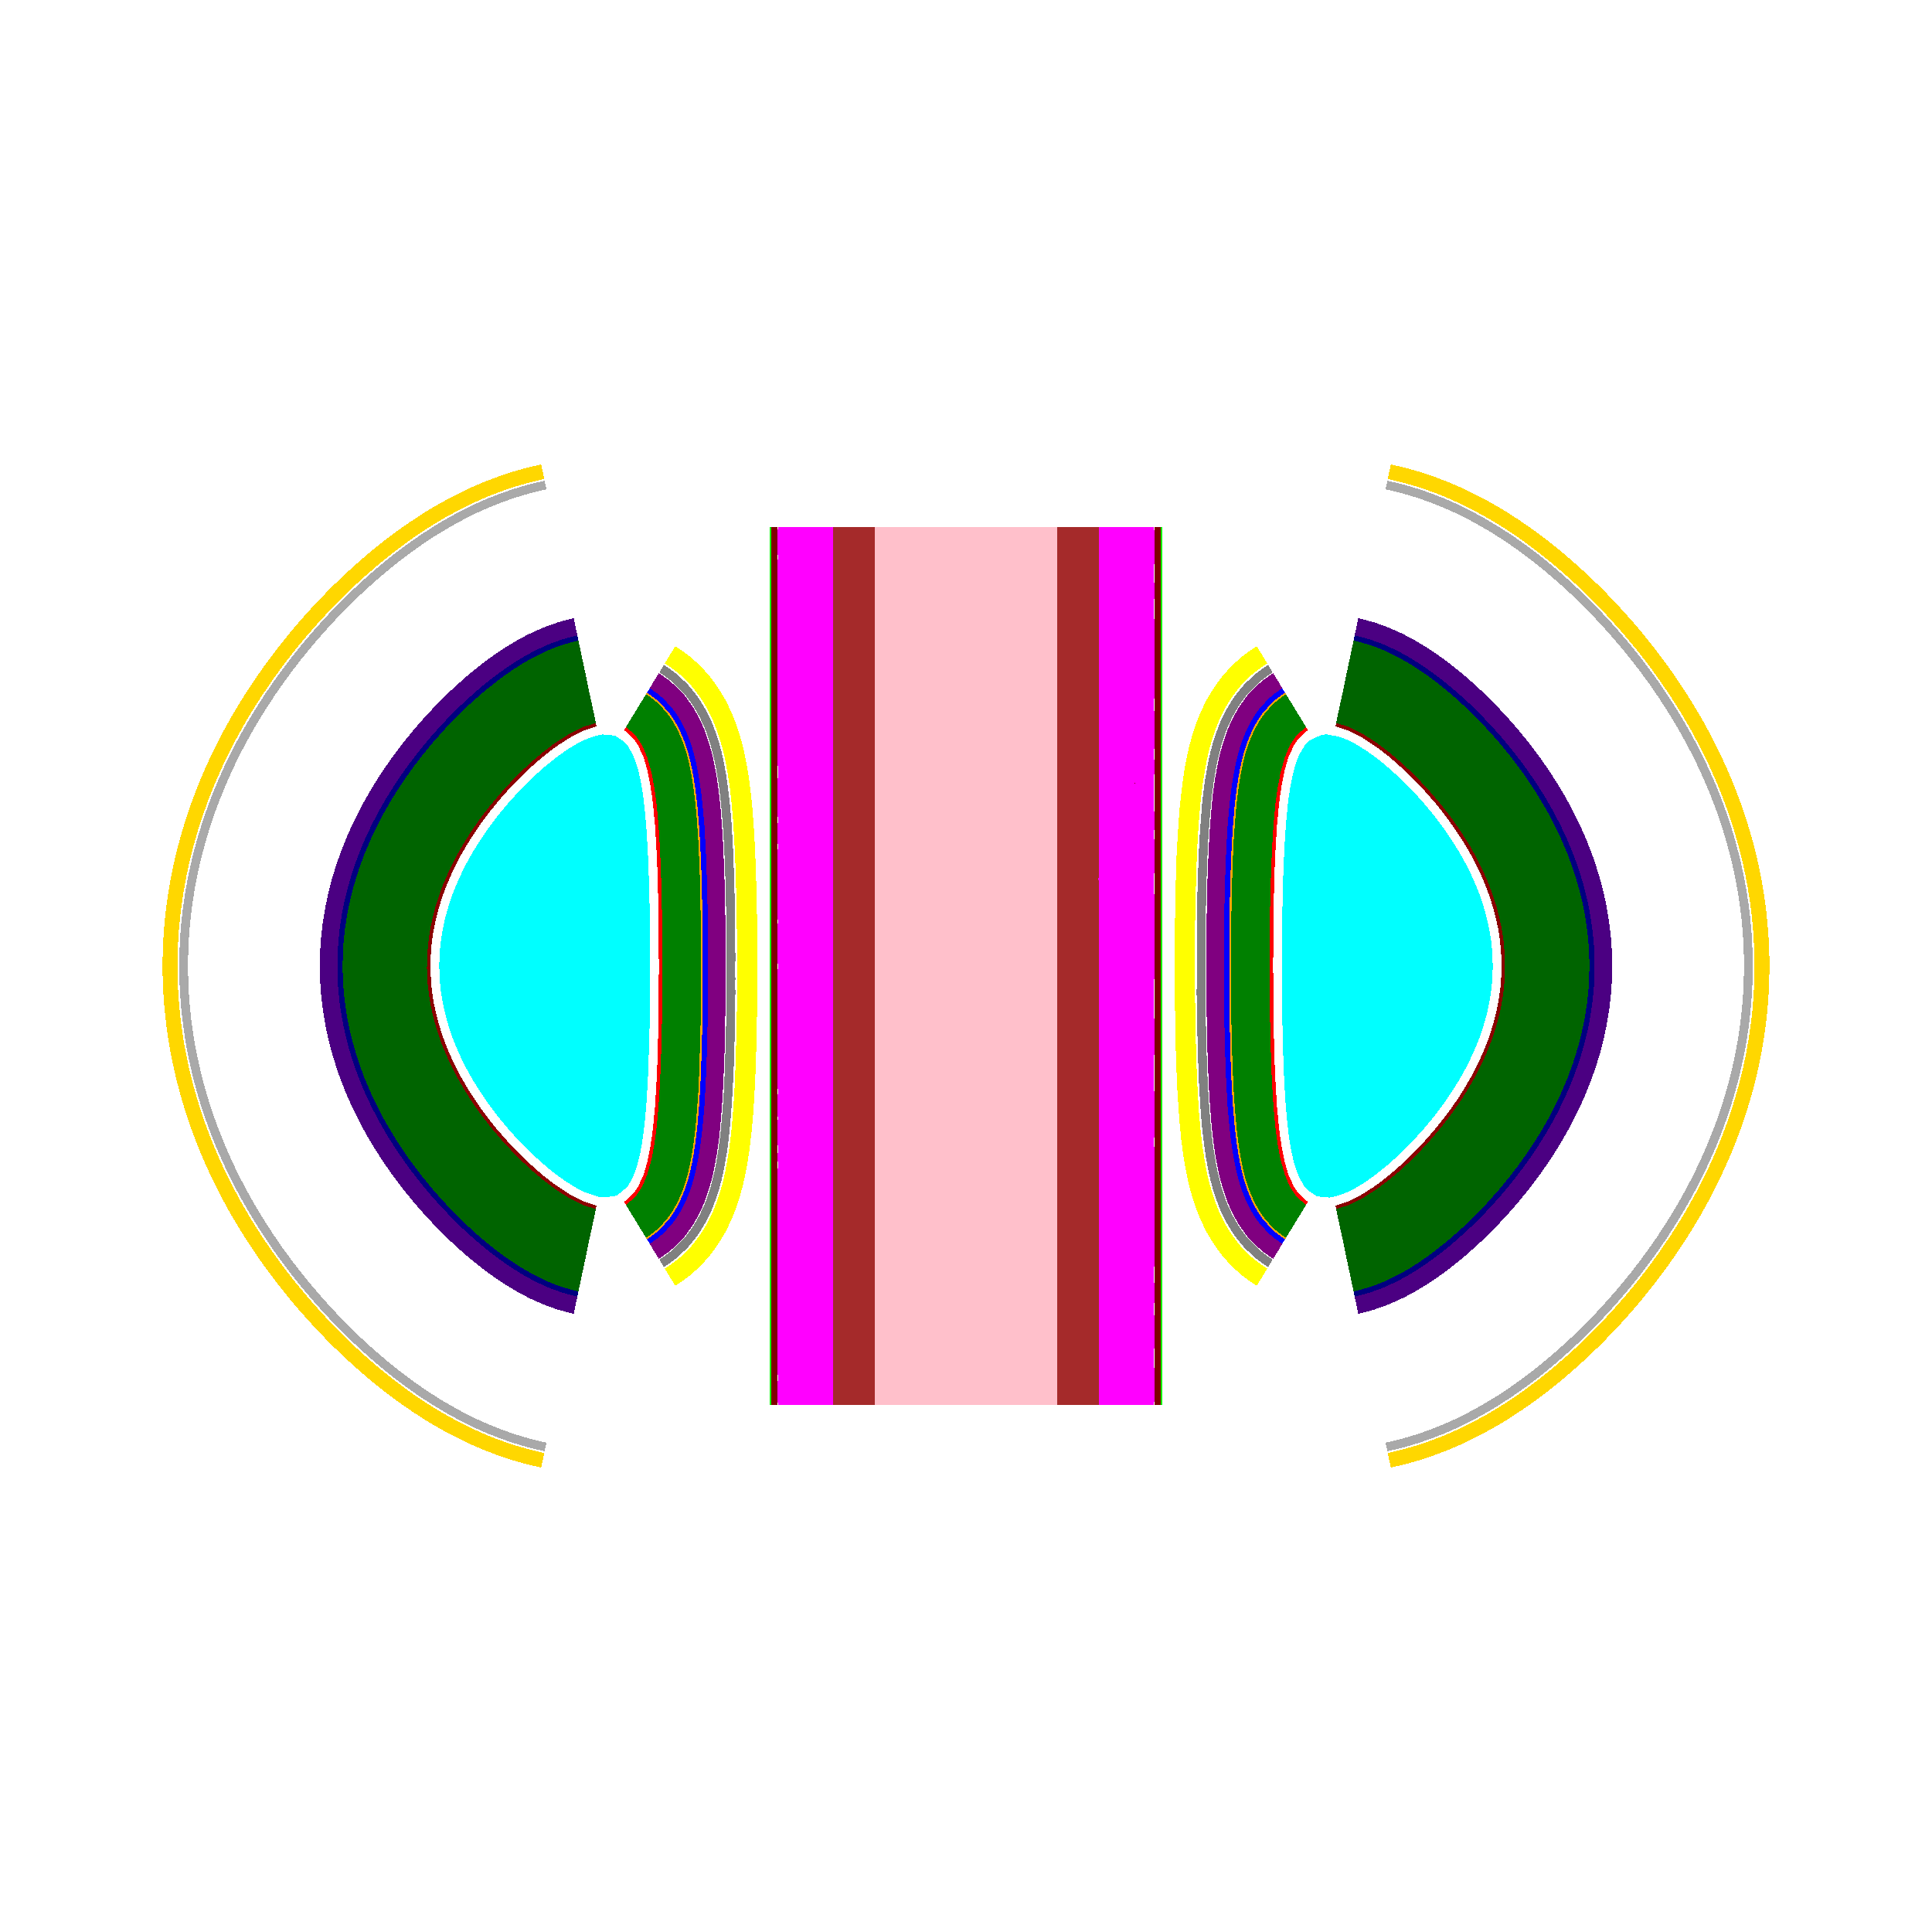

In [32]:
p = openmc.Plot()
p.origin = (0, 10, 0)
p.pixels = (2500, 2500)
p.width = (2200, 2200)
p.basis = 'xz'
p.color_by = 'material'
p.colors = {
    1: 'cyan',
    2: 'red',
    3: 'darkred',
    4: 'green',
    5: 'darkgreen',
    6: 'orange',
    7: 'blue',
    8: 'navy',
    9: 'purple',
    10: 'indigo',
    11: 'grey',
    12: 'darkgrey',
    13: 'yellow',
    14: 'gold',
    15: 'pink',
    16: 'brown',
    17: 'maroon',
    18: 'magenta',
    19: 'lime'
}
openmc.plot_inline([p])


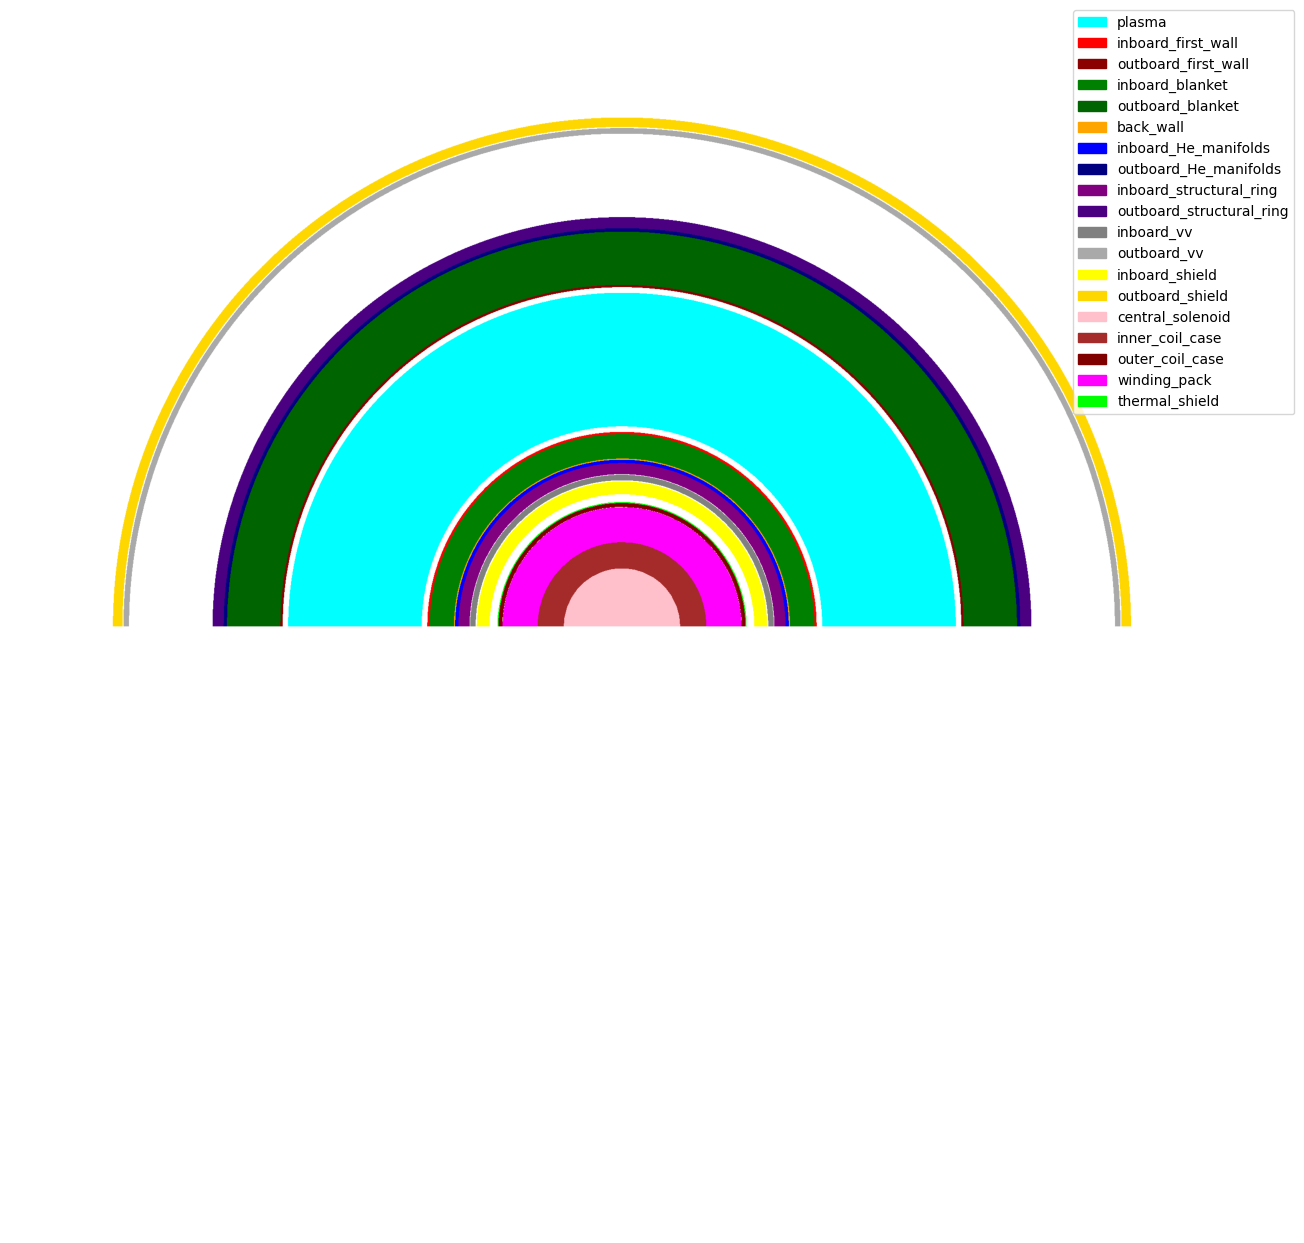

In [33]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.image as mpimg

# Load the plot image
img = mpimg.imread('plot_16.png')  # or 'xy.png' if converted

# Show the image
plt.figure(figsize=( 13,13))
plt.pixels=(2500,2500)
plt.imshow(img)
plt.axis('off')  # hide axes

# Define legend entries (match colors above)
legend_labels = {
    'plasma': 'cyan',
    'inboard_first_wall': 'red',
    'outboard_first_wall': 'darkred',
    'inboard_blanket': 'green',
    'outboard_blanket': 'darkgreen',
    'back_wall': 'orange',
    'inboard_He_manifolds': 'blue',
    'outboard_He_manifolds': 'navy',
    'inboard_structural_ring': 'purple',
    'outboard_structural_ring': 'indigo',
    'inboard_vv': 'grey',
    'outboard_vv': 'darkgrey',
    'inboard_shield': 'yellow',
    'outboard_shield': 'gold',
    'central_solenoid': 'pink',
    'inner_coil_case': 'brown',
    'outer_coil_case': 'maroon',
    'winding_pack': 'magenta',
    'thermal_shield': 'lime'
}

patches = [mpatches.Patch(color=color, label=label) for label, color in legend_labels.items()]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper right', borderaxespad=0.)
plt.tight_layout()
plt.show()

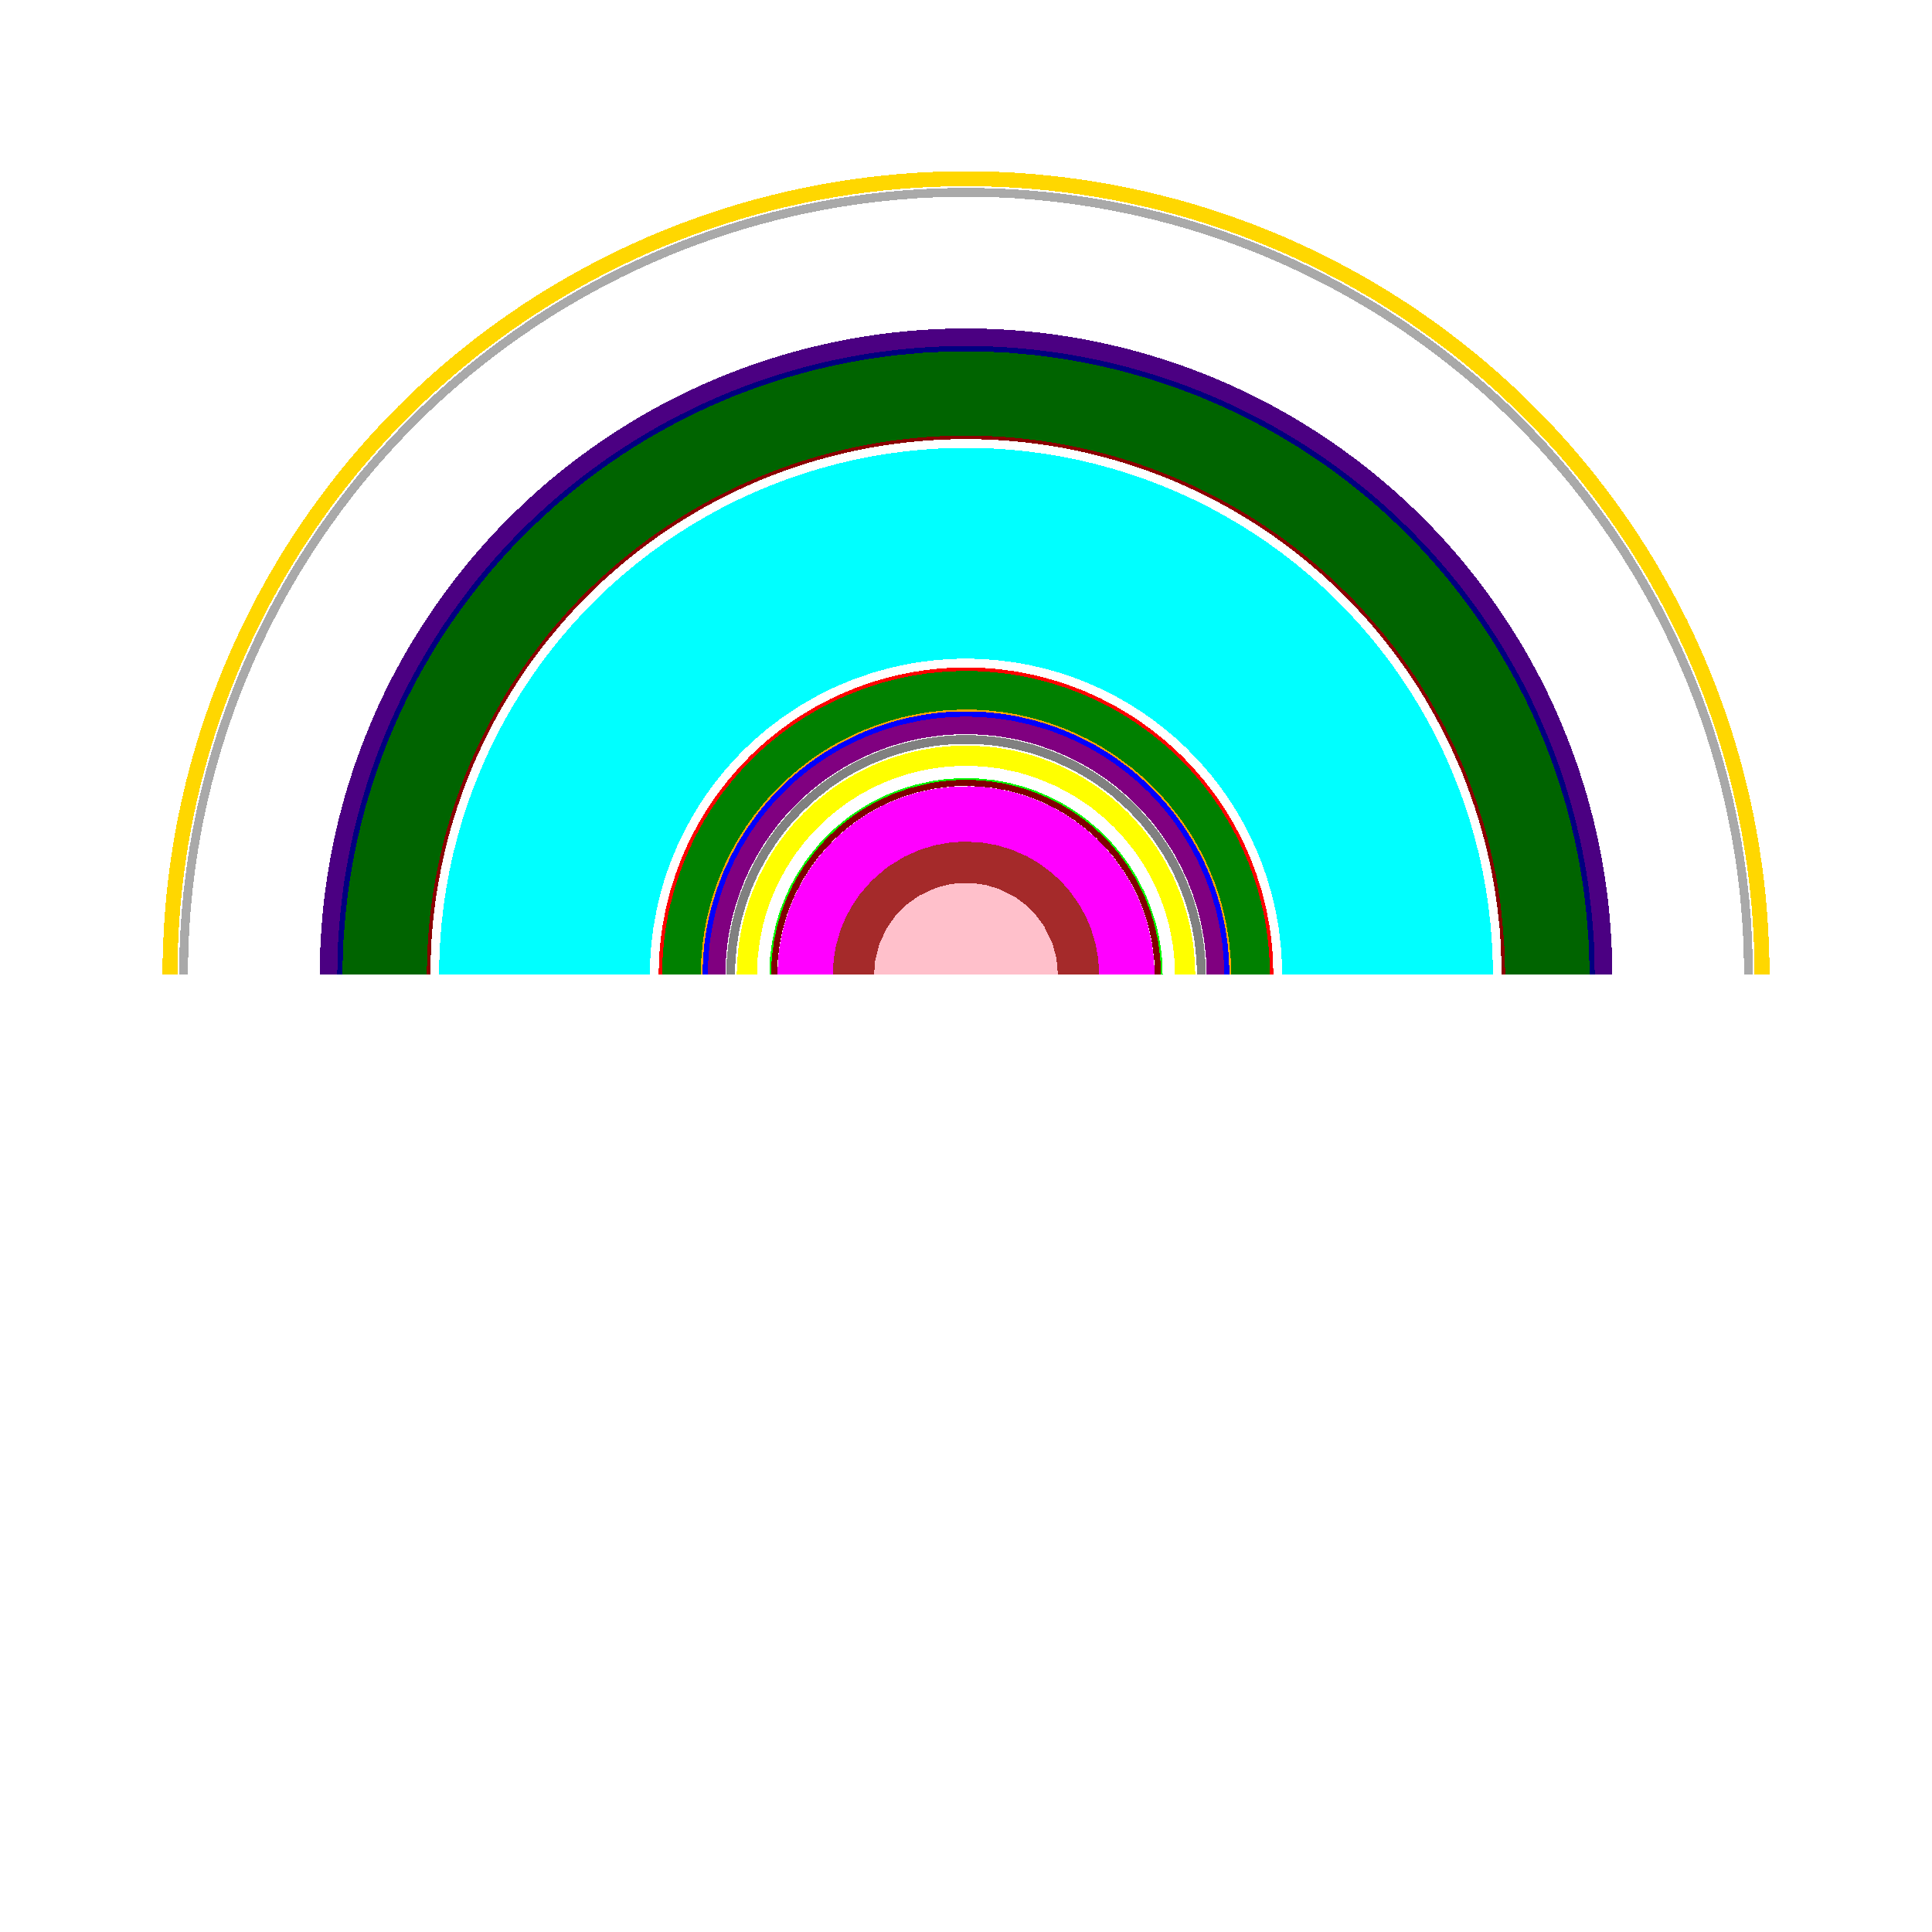

In [49]:
p.basis = 'xy'
openmc.plot_inline(p)

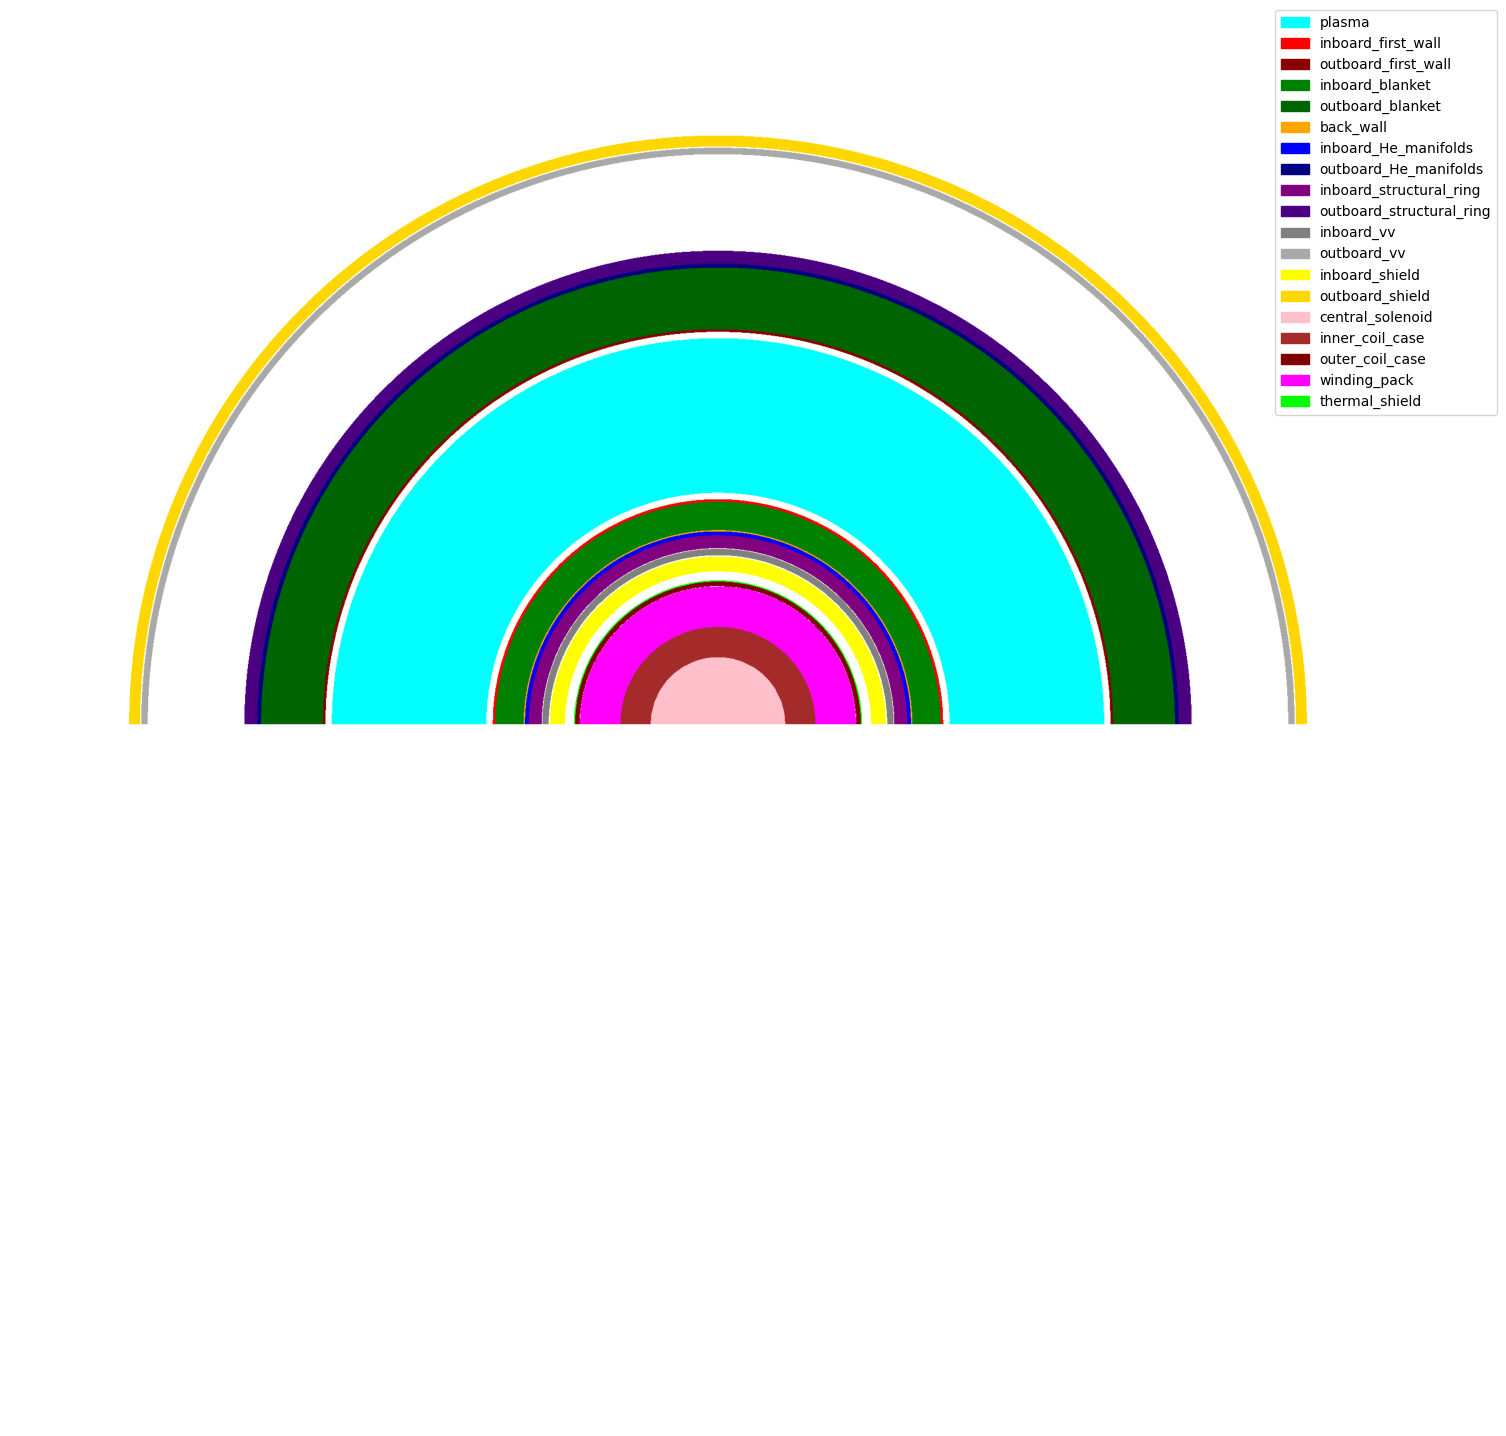

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.image as mpimg

# Load the plot image
img = mpimg.imread('plot_16.png')  # or 'xy.png' if converted

# Show the image
plt.figure(figsize=( 15,15))
plt.pixels=(2500,2500)
plt.imshow(img)
plt.axis('off')  # hide axes

# Define legend entries (match colors above)
legend_labels = {
    'plasma': 'cyan',
    'inboard_first_wall': 'red',
    'outboard_first_wall': 'darkred',
    'inboard_blanket': 'green',
    'outboard_blanket': 'darkgreen',
    'back_wall': 'orange',
    'inboard_He_manifolds': 'blue',
    'outboard_He_manifolds': 'navy',
    'inboard_structural_ring': 'purple',
    'outboard_structural_ring': 'indigo',
    'inboard_vv': 'grey',
    'outboard_vv': 'darkgrey',
    'inboard_shield': 'yellow',
    'outboard_shield': 'gold',
    'central_solenoid': 'pink',
    'inner_coil_case': 'brown',
    'outer_coil_case': 'maroon',
    'winding_pack': 'magenta',
    'thermal_shield': 'lime'
}

patches = [mpatches.Patch(color=color, label=label) for label, color in legend_labels.items()]
plt.legend(handles=patches, bbox_to_anchor=(0.75, 0.2) loc='upper right', borderaxespad=0.)
plt.tight_layout()
plt.show()

In [ ]:
p.basis = 'yz'
openmc.plot_inline(p)

In [69]:
# starts the simulation
!rm -rf *.h5

model.run(threads=16)

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

PosixPath('/home/rifat/codes/FNSF Reactor/statepoint.100.h5')

In [24]:
# open the results file
import openmc
sp = openmc.StatePoint("statepoint.100.h5")

for tally_id, tally in sp.tallies.items():
    print(f"Tally ID: {tally_id}, Tally Name: {tally.name}")


Tally ID: 1, Tally Name: x flux
Tally ID: 2, Tally Name: uheating
Tally ID: 3, Tally Name: heating
Tally ID: 4, Tally Name: tbr
Tally ID: 5, Tally Name: utbr
Tally ID: 6, Tally Name: z flux
Tally ID: 7, Tally Name: energetic flux
Tally ID: 8, Tally Name: absorption
Tally ID: 9, Tally Name: uabsorption
Tally ID: 10, Tally Name: damage energy
Tally ID: 11, Tally Name: udamage energy


In [48]:
heating_tally=sp.get_tally(name='heating')
heating = heating_tally.get_slice(scores=['heating'])
heating_umesh = heating.find_filter(openmc.MeshFilter).mesh
print(f"The reactor has {heating.mean.sum()/1e6} MeV/source particle deposited")
print(f"Standard deviation on the heating is {heating.std_dev.sum()/1e6}MeV/source particle deposited")

heating_filter = heating.find_filter(openmc.MeshFilter)
heating_mesh = heating_filter.mesh

centroids = heating_mesh.centroids  # not needed in the next release of openmc
mesh_vols = heating_mesh.volumes  # not needed in the next release of openmc

heating_mesh.write_data_to_vtk(
    datasets={"mean": heating.mean.flatten()},
    filename="heating results.vtk",
)
heating_mesh.write_data_to_vtk(
    datasets={"std_dev": heating.std_dev.flatten()},
    filename="heating std dev results.vtk",
)

The reactor has 0.0 MeV/source particle deposited
Standard deviation on the heating is 0.0MeV/source particle deposited


In [15]:
print(heating)

Tally
	ID             =	12
	Name           =	heating
	Filters        =	MeshFilter
	Nuclides       =	total
	Scores         =	['heating']
	Estimator      =	tracklength
	Multiply dens. =	True


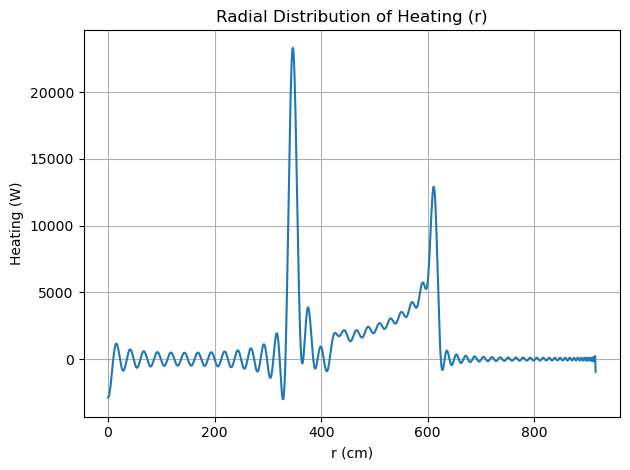

In [17]:
reactor_volume=650795584.8287685
xheating=sp.get_tally(name='uheating')
hdf=xheating.get_pandas_dataframe()
# Spatial domain (along z)
H = openmc.ZernikeRadial(hdf['mean'], radius=915)
r = np.linspace(0, 915, 1000)

heat_reconstructed = np.array(H(r))
scaled_heat= heat_reconstructed*source_density*1.6e-19
plt.plot(r, scaled_heat)
plt.yscale('linear')
plt.xlabel('r (cm)')
plt.ylabel('Heating (W)')
plt.title('Radial Distribution of Heating (r)')
plt.grid(True)
plt.tight_layout()
plt.show()

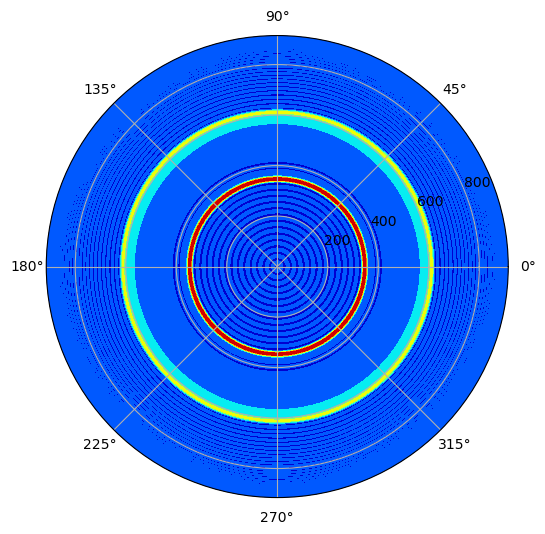

In [50]:
azimuths = np.radians(np.linspace(0, 360, 1000))
zeniths = np.linspace(0, 915, 1000)
R, theta = np.meshgrid(zeniths, azimuths)
values = [[i for i in H(zeniths)] for j in range(len(azimuths))]
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'), figsize=(6,6))
ax.contourf(theta, R, values, cmap='jet')
plt.show()

In [17]:
trit_tally = sp.get_tally(name='tbr')
trit_value = trit_tally.get_values(scores=['(n,Xt)'])
print('trit value:', trit_tally.mean.sum(), "+/-", trit_tally.std_dev.sum())
tdf=trit_tally.get_pandas_dataframe()
print(tdf.head())

trit value: 1.0940460683357704 +/- 0.0005095209578069488
  nuclide   score      mean  std. dev.
0     Li6  (n,Xt)  1.068998   0.000494
1     Li7  (n,Xt)  0.025048   0.000015


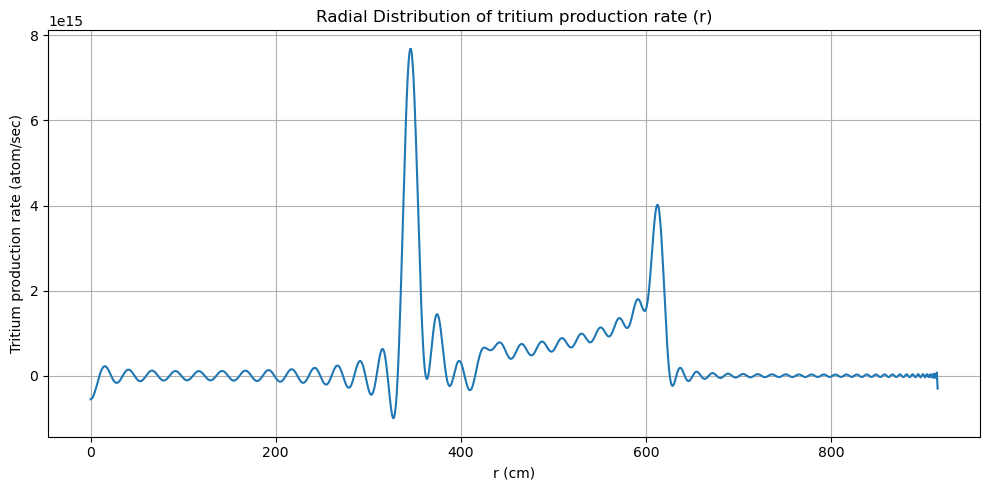

In [11]:
xtbr=sp.get_tally(name='utbr')
tdf=xtbr.get_pandas_dataframe()
# Spatial domain (along z)
T = openmc.ZernikeRadial(tdf['mean'], radius=915)
t_reconstructed = np.array(T(r))
scaled_t = t_reconstructed*source_density
r = np.linspace(0, 915, 1000)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(r,scaled_t )
plt.yscale('linear')
plt.xlabel('r (cm)')
plt.ylabel('Tritium production rate (atom/sec)')
plt.title('Radial Distribution of tritium production rate (r)')
plt.grid(True)
plt.tight_layout()
plt.show()

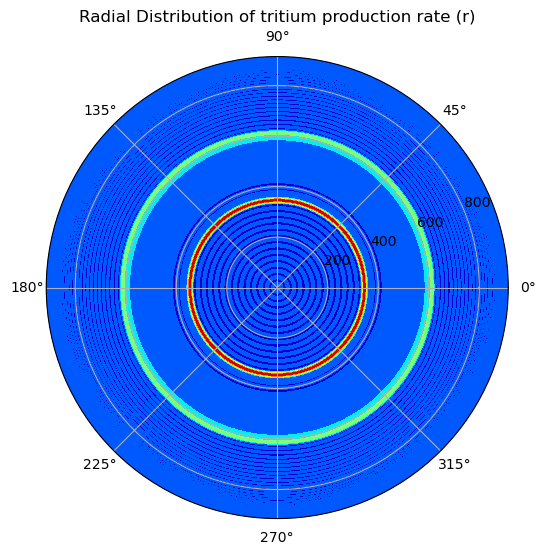

In [12]:
azimuths = np.radians(np.linspace(0, 360, 1000))
zeniths = np.linspace(0, 915, 1000)
R, theta = np.meshgrid(zeniths, azimuths)
values = [[i for i in T(zeniths)] for j in range(len(azimuths))]
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'), figsize=(6,6))
ax.contourf(theta, R, values, cmap='jet')
plt.title('Radial Distribution of tritium production rate (r)')
plt.show()

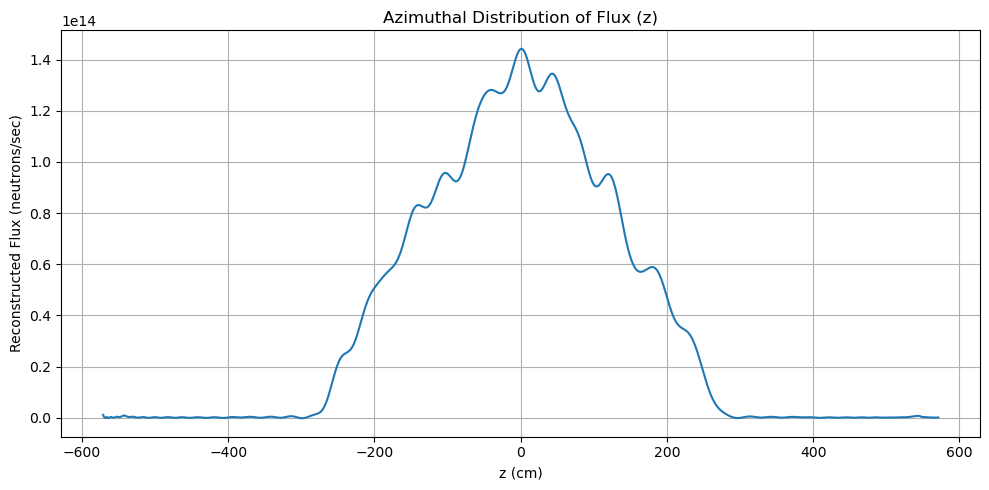

In [13]:
zflux=sp.get_tally(name='z flux')
fdf=zflux.get_pandas_dataframe()
# Spatial domain (along z)
zmin = -571
zmax = 571
order2=100
import numpy as np
z_vals = np.linspace(zmin, zmax, 1000)
n = np.arange(order2 + 1)
a_n = (2*n + 1)/2 * fdf['mean']
phi = np.polynomial.Legendre(a_n/10, domain=(zmin, zmax))

# Plot
plt.figure(figsize=(10, 5))
plt.plot(z_vals, phi(z_vals)* source_density/reactor_volume)
plt.yscale('linear')
plt.xlabel('z (cm)')
plt.ylabel('Reconstructed Flux (neutrons/sec)')
plt.title('Azimuthal Distribution of Flux (z)')
plt.grid(True)
plt.tight_layout()
plt.show()

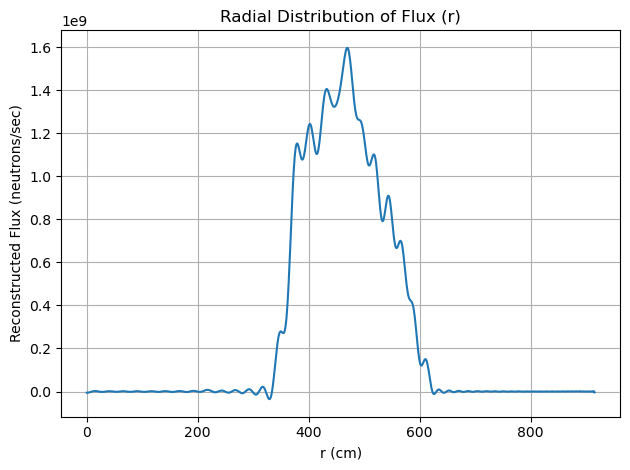

In [14]:
flux=sp.get_tally(name='x flux')
fdf1=flux.get_pandas_dataframe()
# Spatial domain (along z)
F = openmc.ZernikeRadial(fdf1['mean'].values, radius=915)
r = np.linspace(0, 915, 1000)
flux_reconstructed = np.array(F(r))
scaled_flux = flux_reconstructed * source_density/reactor_volume
# Plot

plt.plot(r, scaled_flux)
plt.yscale('linear')
plt.xlabel('r (cm)')
plt.ylabel('Reconstructed Flux (neutrons/sec)')
plt.title('Radial Distribution of Flux (r)')
plt.grid(True)
plt.tight_layout()
plt.show()

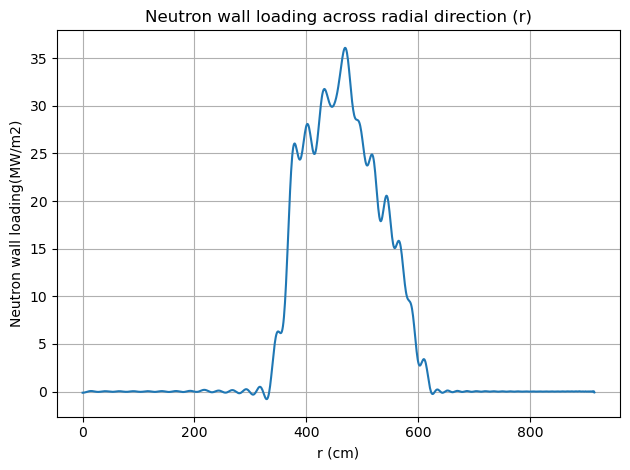

In [15]:
nwl = np.array(F(r))
scaled_flux = nwl* source_density/reactor_volume
wall_loading=scaled_flux*2.26e-8
# Plot
plt.plot(r, wall_loading)
plt.yscale('linear')
plt.xlabel('r (cm)')
plt.ylabel('Neutron wall loading(MW/m2)')
plt.title('Neutron wall loading across radial direction (r)')
plt.grid(True)
plt.tight_layout()
plt.show()

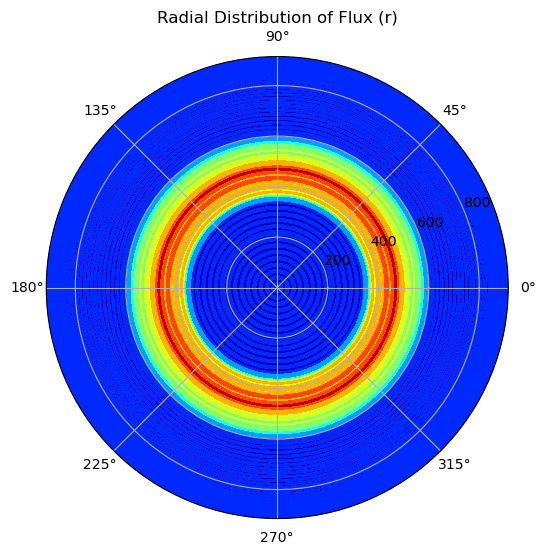

In [61]:
azimuths = np.radians(np.linspace(0, 360, 1000))
zeniths = np.linspace(0, 915, 1000)
R, theta = np.meshgrid(zeniths, azimuths)
values = [[i for i in F(zeniths)] for j in range(len(azimuths))]
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'), figsize=(6,6))
ax.contourf(theta, R, values, cmap='jet')
plt.title('Radial Distribution of Flux (r)')
plt.show()

In [ ]:
flux1=sp.get_tally(name='energetic flux')
print(flux1.shape)
import numpy as np
print(energy.shape)
flux2 = flux1.mean.flatten()
print("Energy shape:", np.shape(energy))
print("Flux2 shape:", np.shape(flux2))
reactor_volume=650795584.8287685

(1000, 1, 1)
(1001,)
Energy shape: (1001,)
Flux2 shape: (1000,)


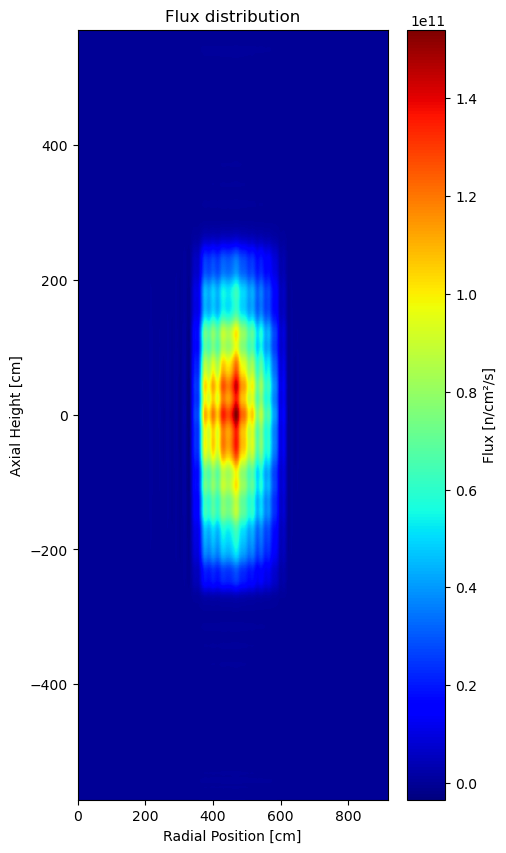

In [23]:
# Mesh definitions
zeniths = np.linspace(0, 915, 1000)  # radial mesh [cm]
zmin, zmax = -571, 571              # axial range [cm]
z = np.linspace(zmin, zmax, 1000)   # axial mesh [cm]

# Assume phi(z) and F(r) return 1D arrays of shape (1000,)
# And reactor_volume is a scalar
phi_values = np.array(phi(z)) * source_density / reactor_volume       # shape: (1000,)
F_values = np.array(F(zeniths))    # shape: (1000,)

# Compute outer product for 2D flux distribution
flux = np.outer(phi_values, F_values)              # shape: (1000, 1000)

# Plotting
plt.figure(figsize=(5,10))
plt.title('Flux distribution')
plt.xlabel('Radial Position [cm]')
plt.ylabel('Axial Height [cm]')
plt.pcolor(zeniths, z, flux, cmap='jet', shading='auto')
plt.colorbar(label='Flux [n/cm²/s]')
plt.show()


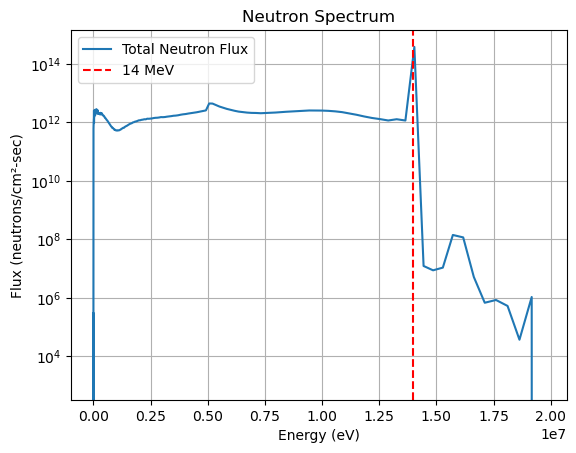

In [29]:
import numpy as np
import matplotlib.pyplot as plt
energy_midpoints = 0.5 * (energies[:-1] + energies[1:])

plt.plot(energy_midpoints,flux2*source_density/reactor_volume, label='Total Neutron Flux')

plt.axvline(14e6, color='red', linestyle='--', label='14 MeV')
plt.xlabel('Energy (eV)')
plt.ylabel('Flux (neutrons/cm²-sec)')
plt.xscale('linear')
plt.yscale('log')
plt.title('Neutron Spectrum')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
absorption_tally=sp.get_tally(name='absorption')
absorption = absorption_tally.get_slice(scores=['absorption'])
absorption_umesh = absorption.find_filter(openmc.MeshFilter).mesh
print(f"The reactor has an absorption rate of {absorption.mean.sum()}/source particle deposited")
print(f"Standard deviation on the absorption is {absorption.std_dev.sum()}/source particle deposited")

absorption_filter = absorption.find_filter(openmc.MeshFilter)
absorption_mesh = absorption_filter.mesh

centroids = absorption_mesh.centroids  # not needed in the next release of openmc
mesh_vols = absorption_mesh.volumes  # not needed in the next release of openmc

absorption_mesh.write_data_to_vtk(
    datasets={"mean": absorption.mean.flatten()},
    filename="absorption results.vtk",
)
absorption_mesh.write_data_to_vtk(
    datasets={"std_dev": absorption.std_dev.flatten()},
    filename="absorption std dev results.vtk",
)

The reactor has an absorption rate of 0.0/source particle deposited
Standard deviation on the absorption is 0.0/source particle deposited


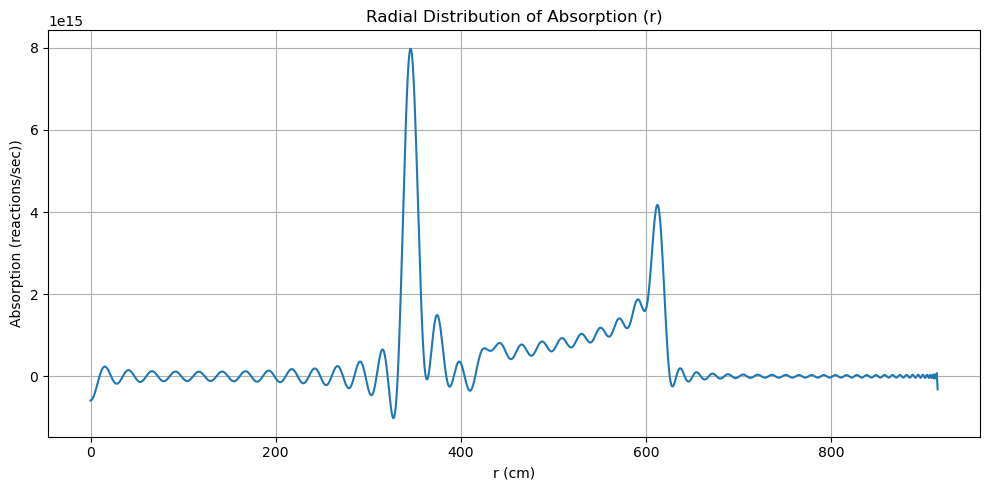

In [27]:
uabsorption_tally=sp.get_tally(name='uabsorption')
uabsorption = uabsorption_tally.get_slice(scores=['absorption'])
udf=uabsorption.get_pandas_dataframe()

# Spatial domain (along z)
A = openmc.ZernikeRadial(udf['mean'], radius=915)
r = np.linspace(0, 915, 1000)
absorption_reconstructed = np.array(A(r))
scaled_absorption = absorption_reconstructed * source_density

# Plot
plt.figure(figsize=(10, 5))
plt.plot(r, scaled_absorption)
plt.xlabel('r (cm)')
plt.ylabel('Absorption (reactions/sec))')
plt.title('Radial Distribution of Absorption (r)')
plt.grid(True)
plt.tight_layout()
plt.show()

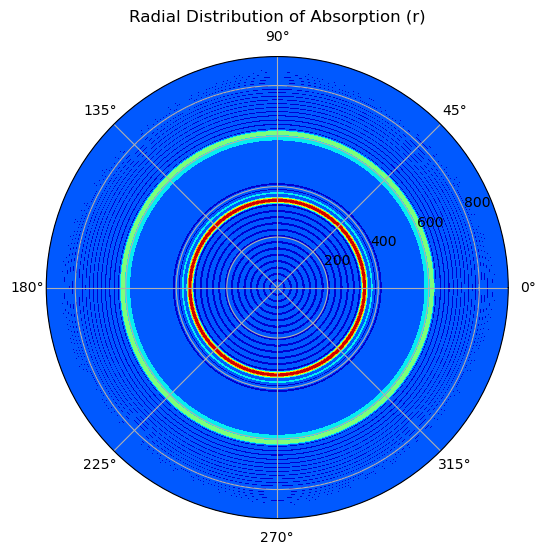

In [65]:
azimuths = np.radians(np.linspace(0, 360, 1000))
zeniths = np.linspace(0, 915, 1000)
R, theta = np.meshgrid(zeniths, azimuths)
values = [[i for i in A(zeniths)] for j in range(len(azimuths))]
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'), figsize=(6,6))
ax.contourf(theta, R, values, cmap='jet')
plt.title('Radial Distribution of Absorption (r)')
plt.show()

In [14]:
edmg_tally=sp.get_tally(name='damage energy')
edmg = edmg_tally.get_slice(scores=['damage-energy'])
edmg_umesh = edmg.find_filter(openmc.MeshFilter).mesh
print(f"The reactor has an damage energy of {edmg.mean.sum()/1e6} MeV/source particle deposited")
print(f"Standard deviation on the absorption is {edmg.std_dev.sum()/1e6} MeV/source particle deposited")

edmg_filter = edmg.find_filter(openmc.MeshFilter)
edmg_mesh = edmg_filter.mesh

centroids = edmg_umesh.centroids  # not needed in the next release of openmc
mesh_vols = edmg_umesh.volumes  # not needed in the next release of openmc

edmg_mesh.write_data_to_vtk(
    datasets={"mean": edmg.mean.flatten()},
    filename="edmg results.vtk",
)
edmg_mesh.write_data_to_vtk(
    datasets={"std_dev": edmg.std_dev.flatten()},
    filename="edmg std dev results.vtk",
)

The reactor has an damage energy of 0.0 MeV/source particle deposited
Standard deviation on the absorption is 0.0 MeV/source particle deposited


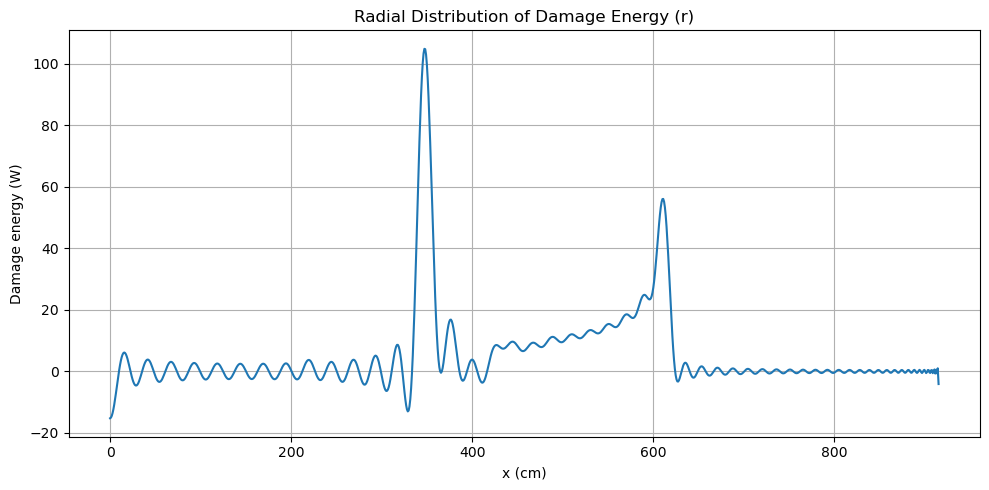

In [28]:
uedmg_tally=sp.get_tally(name='udamage energy')
uedmg = uedmg_tally.get_slice(scores=['damage-energy'])

edf=uedmg.get_pandas_dataframe()

E = openmc.ZernikeRadial(edf['mean'], radius=915)
r = np.linspace(0, 915, 1000)
edmg_reconstructed = np.array(E(r))
scaled_edmg = edmg_reconstructed * source_density*1.6e-19

# Plot
plt.figure(figsize=(10, 5))
plt.plot(r, scaled_edmg)
plt.xlabel('x (cm)')
plt.ylabel('Damage energy (W)')
plt.title('Radial Distribution of Damage Energy (r)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
azimuths = np.radians(np.linspace(0, 360, 1000))
zeniths = np.linspace(0, 915, 1000)
R, theta = np.meshgrid(zeniths, azimuths)
values = [[i for i in E(zeniths)] for j in range(len(azimuths))]
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'), figsize=(6,6))
ax.contourf(theta, R, values, cmap='jet')
plt.title('Radial Distribution of Damage Energy (r)')
plt.show()